# Data Analysis and preprocessing on the Pima Indian Diabetic Dataset

In [80]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
#% matplotlib inline

In [81]:
from sklearn.metrics import confusion_matrix,accuracy_score,matthews_corrcoef,f1_score
from sklearn.metrics import classification_report,roc_curve,roc_auc_score
#from sklearn.externals import joblib
from matplotlib import pyplot as plt
#import seaborn as sns
import joblib

In [82]:
dataframe = pd.read_csv("diabetes.csv")
dataframe.shape

(768, 9)

In [83]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [84]:
dataframe.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [85]:
# Preprocess the data, mark zero values as NaN and drop
columns = ['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in columns:
    dataframe[col].replace(0, np.NaN, inplace=True)
    
dataframe.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,657.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,4.494673,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.217291,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,4.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,7.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [86]:

##We can observe from the statistics that the maximum value of insulin is above 3 standard deviations that means there are 
# outliers in the insulin column so we will remove the data which is 2 standard deviations above


dataframe.loc[((dataframe["Insulin"] > 425))] = np.nan
dataframe.isnull().sum()

Pregnancies                 126
Glucose                      23
BloodPressure                53
SkinThickness               245
Insulin                     392
BMI                          29
DiabetesPedigreeFunction     18
Age                          18
Outcome                      18
dtype: int64

In [87]:
for f in ['Pregnancies', 
          'Glucose', 
          'BloodPressure', 
          'SkinThickness',
          'Insulin','BMI','DiabetesPedigreeFunction','Age']:dataframe.loc[dataframe[f].isnull(), f] = dataframe[f].mean()


In [88]:
dataframe['Outcome'].replace(np.NaN, 0, inplace=True)
dataframe.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.171813       0.260686       0.145505   
Glucose                      0.171813  1.000000       0.226504       0.169845   
BloodPressure                0.260686  0.226504       1.000000       0.189654   
SkinThickness                0.145505  0.169845       0.189654       1.000000   
Insulin                      0.112954  0.392615       0.077487       0.122716   
BMI                          0.122937  0.218096       0.280704       0.540275   
DiabetesPedigreeFunction    -0.003405  0.118025      -0.002308       0.084986   
Age                          0.514409  0.273147       0.337865       0.137129   
Outcome                      0.251347  0.487153       0.173179       0.215064   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies               0.112954  0.122937                 -0.003405   
Glucose                   0.392615  0.218

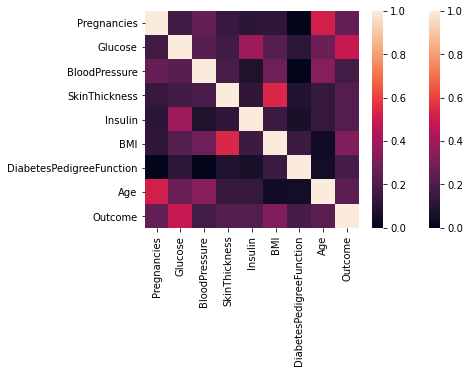

In [89]:
corr = dataframe.corr()
print(corr)
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns)

import seaborn as sns
import matplotlib as plt
corr = dataframe.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

C:\Users\bhumikapunjabi2294\anaconda3\envs\mytensorflow\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


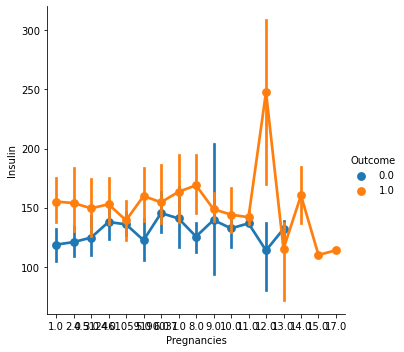

In [90]:
sns.factorplot(x='Pregnancies',y='Insulin',data=dataframe,hue='Outcome')

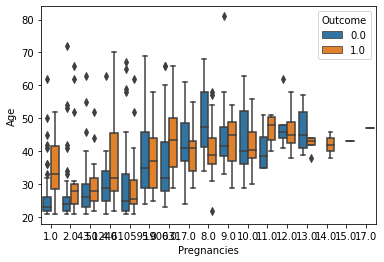

In [91]:
sns.boxplot(x="Pregnancies",y="Age",data=dataframe,hue="Outcome")

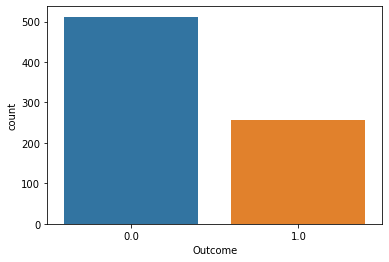

In [92]:
sns.countplot(x="Outcome",data=dataframe)

In [93]:
def mydf_splitter(my_df,num_rows):
    return my_df[:num_rows].copy(),my_df[num_rows:]


mydf_train_valid,mydf_test = mydf_splitter(dataframe,650)

print(mydf_train_valid.shape,mydf_test.shape)

(650, 9) (118, 9)


In [94]:
Y = mydf_train_valid[["Outcome"]]
X = mydf_train_valid.drop(["Outcome"],axis = 1)

In [95]:
X_train,X_valid = mydf_splitter(X,500)
Y_train,Y_valid = mydf_splitter(Y,500)

print(X_train.shape,X_valid.shape,Y_train.shape,Y_valid.shape)

(500, 8) (150, 8) (500, 1) (150, 1)


In [96]:
Y_train

,Outcome
0,1.0
1,0.0
2,1.0
3,0.0
4,1.0
...,...
495,0.0
496,0.0
497,0.0
498,1.0


In [97]:
X_test = mydf_test.drop(["Outcome"],axis = 1)
Y_test = mydf_test[["Outcome"]]

In [98]:
trainLabel = np.asarray(Y_train)
trainData = np.asarray(X_train)
validLabel = np.asarray(Y_valid)
validData = np.asarray(X_valid)
testLabel = np.asarray(Y_test)
testData = np.asarray(X_test)

In [99]:
from keras.utils import to_categorical
train_labels = to_categorical(trainLabel)
valid_labels = to_categorical(validLabel)
test_labels = to_categorical(testLabel)

In [100]:
means = np.mean(trainData, axis=0)
stds = np.std(trainData, axis=0)
trainData = (trainData - means)/stds
validData =(validData - means)/stds
testData = (testData - means)/stds

In [101]:
np.mean(testData, axis=0)

array([-0.03162006,  0.08947986,  0.11528311,  0.14278066,  0.11980269,
        0.14391006, -0.10798111,  0.11422012])

In [102]:
np.std(testData, axis=0)

array([1.10839346, 0.98222124, 1.11662098, 0.90747312, 0.93078566,
       0.92283418, 0.85128951, 1.06625067])

# Build DNN model with training data

In [103]:
# Start defining the model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(500, input_dim = 8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(100, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    # compile the model
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model

model = create_model()
print(model.summary())

Model: "sequential_314"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_940 (Dense)            (None, 500)               4500      
_________________________________________________________________
dense_941 (Dense)            (None, 100)               50100     
_________________________________________________________________
dense_942 (Dense)            (None, 1)                 101       
Total params: 54,701
Trainable params: 54,701
Non-trainable params: 0
_________________________________________________________________
None


In [25]:
model = Sequential()
model.add(Dense(40, input_dim = 8, kernel_initializer='normal', activation='relu'))
model.add(Dense(20,  input_dim = 8, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [104]:
history = model.fit(trainData,trainLabel, epochs=70, batch_size=20, validation_data=(validData, validLabel))

Train on 500 samples, validate on 150 samples
Epoch 1/70
500/500 [==============================] - 1s 1ms/step - loss: 0.5445 - accuracy: 0.7460 - val_loss: 0.3486 - val_accuracy: 0.8467
Epoch 2/70
500/500 [==============================] - 0s 427us/step - loss: 0.4729 - accuracy: 0.7760 - val_loss: 0.3468 - val_accuracy: 0.8467
Epoch 3/70
500/500 [==============================] - 0s 332us/step - loss: 0.4589 - accuracy: 0.7920 - val_loss: 0.3427 - val_accuracy: 0.8467
Epoch 4/70
500/500 [==============================] - 0s 298us/step - loss: 0.4522 - accuracy: 0.7860 - val_loss: 0.3487 - val_accuracy: 0.8667
Epoch 5/70
500/500 [==============================] - 0s 298us/step - loss: 0.4425 - accuracy: 0.7980 - val_loss: 0.3417 - val_accuracy: 0.8600
Epoch 6/70
500/500 [==============================] - 0s 330us/step - loss: 0.4390 - accuracy: 0.7960 - val_loss: 0.3503 - val_accuracy: 0.8533
Epoch 7/70
500/500 [==============================] - 0s 360us/step - loss: 0.4295 - accurac

500/500 [==============================] - 0s 394us/step - loss: 0.0924 - accuracy: 0.9740 - val_loss: 0.5141 - val_accuracy: 0.8200
Epoch 58/70
500/500 [==============================] - 0s 402us/step - loss: 0.0962 - accuracy: 0.9700 - val_loss: 0.5516 - val_accuracy: 0.8133
Epoch 59/70
500/500 [==============================] - 0s 394us/step - loss: 0.0978 - accuracy: 0.9820 - val_loss: 0.5787 - val_accuracy: 0.8333
Epoch 60/70
500/500 [==============================] - 0s 410us/step - loss: 0.0889 - accuracy: 0.9760 - val_loss: 0.5457 - val_accuracy: 0.8467
Epoch 61/70
500/500 [==============================] - 0s 450us/step - loss: 0.0885 - accuracy: 0.9720 - val_loss: 0.5490 - val_accuracy: 0.8333
Epoch 62/70
500/500 [==============================] - 0s 462us/step - loss: 0.0775 - accuracy: 0.9840 - val_loss: 0.5591 - val_accuracy: 0.8200
Epoch 63/70
500/500 [==============================] - 0s 474us/step - loss: 0.0880 - accuracy: 0.9820 - val_loss: 0.5552 - val_accuracy: 0.80

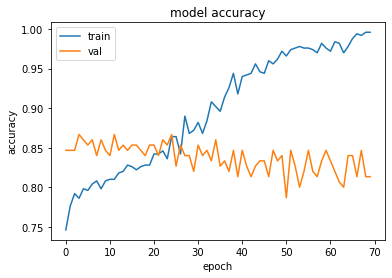

In [105]:
import keras
from matplotlib import pyplot as plt
#history = model.fit(trainData,trainLabel, validation_data=(validData, validLabel), epochs=100, batch_size=4)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [106]:
y_train_pred = model.predict(trainData)
y_train_pred

array([[9.47249532e-01],
       [1.66975008e-03],
       [9.91907716e-01],
       [7.02946127e-05],
       [9.98471320e-01],
       [1.68496519e-02],
       [9.63692844e-01],
       [1.65535912e-01],
       [1.08972238e-02],
       [9.01085734e-01],
       [2.77095996e-02],
       [9.42634702e-01],
       [9.99304117e-04],
       [1.08972238e-02],
       [9.99185503e-01],
       [9.59238172e-01],
       [9.95368481e-01],
       [9.24523652e-01],
       [1.73020326e-02],
       [9.44984257e-01],
       [1.92668084e-02],
       [9.73010249e-03],
       [9.99977827e-01],
       [9.79695559e-01],
       [9.84608114e-01],
       [8.08240116e-01],
       [9.15444314e-01],
       [3.72536988e-08],
       [3.88480665e-04],
       [3.45100649e-02],
       [1.34329926e-02],
       [9.97552574e-01],
       [5.23425580e-04],
       [6.32052766e-09],
       [4.27047014e-02],
       [1.90232493e-06],
       [1.43046439e-01],
       [9.86035943e-01],
       [9.62066174e-01],
       [9.91617620e-01],


In [107]:
from sklearn import metrics
Train_Accuracy = metrics.accuracy_score(trainLabel,y_train_pred.round())
print(Train_Accuracy)

0.998


In [108]:
y_valid_pred = model.predict(validData)
y_valid_pred

array([[3.14395663e-07],
       [1.35032935e-02],
       [9.88488495e-01],
       [4.62234399e-04],
       [1.57860756e-01],
       [1.47442132e-01],
       [9.94175017e-01],
       [1.09117758e-03],
       [8.53860925e-04],
       [2.58866057e-05],
       [5.62964566e-02],
       [1.90613340e-04],
       [2.63493494e-05],
       [2.80909535e-05],
       [2.55167224e-02],
       [2.48179846e-02],
       [9.76313174e-01],
       [1.38023615e-01],
       [8.17067564e-01],
       [6.32607983e-03],
       [3.50285154e-06],
       [3.37583683e-02],
       [7.31305003e-01],
       [9.68300641e-01],
       [3.30722004e-01],
       [4.33474661e-08],
       [5.02554599e-07],
       [7.18870549e-04],
       [3.41105531e-03],
       [1.84684995e-05],
       [4.37149368e-02],
       [2.82849334e-02],
       [8.03439599e-03],
       [5.21847717e-02],
       [1.22996804e-03],
       [3.57647389e-01],
       [1.46792486e-01],
       [5.99352404e-07],
       [6.06896020e-02],
       [9.86089826e-01],


In [109]:
Before_valid_Accuracy = metrics.accuracy_score(validLabel,y_valid_pred.round())
print(Before_valid_Accuracy)

0.8133333333333334


# tune hyper-parameters with validation data

In [32]:
# Do a grid search for the optimal batch size and number of epochs
# import necessary packages
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam

# Define a random seed
seed = 6
np.random.seed(seed)

# Start defining the model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(500, input_dim = 8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(100,kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    # compile the model
    adam = Adam(lr = 0.01)
    model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])
    return model

# create the model
model = KerasClassifier(build_fn = create_model, verbose = 1)

# define the grid search parameters
batch_size = [20, 40, 60, 80, 100]
epochs = [20, 50, 100, 150]
#batch_size = [50, 70, 100]
#epochs = [100, 500, 1000]

# make a dictionary of the grid search parameters
param_grid = dict(batch_size=batch_size, epochs=epochs)

# build and fit the GridSearchCV
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = KFold(random_state=seed), verbose = 10)
grid_results = grid.fit(validData, validLabel)

# summarize the results
print("Best: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))

C:\Users\bhumikapunjabi2294\anaconda3\envs\mytensorflow\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] batch_size=20, epochs=20 ........................................
Epoch 1/20
120/120 [==============================] - 0s 3ms/step - loss: 0.4891 - accuracy: 0.7333
Epoch 2/20
120/120 [==============================] - 0s 292us/step - loss: 0.3011 - accuracy: 0.8667
Epoch 3/20
120/120 [==============================] - 0s 367us/step - loss: 0.2654 - accuracy: 0.8750
Epoch 4/20
120/120 [==============================] - 0s 267us/step - loss: 0.2575 - accuracy: 0.8750
Epoch 5/20
120/120 [==============================] - 0s 292us/step - loss: 0.2079 - accuracy: 0.9250
Epoch 6/20
120/120 [==============================] - 0s 333us/step - loss: 0.1816 - accuracy: 0.9167
Epoch 7/20
120/120 [==============================] - 0s 325us/step - loss: 0.1394 - accuracy: 0.9583
Epoch 8/20
120/120 [==============================] - 0s 292us/step - loss: 0.1106 - accuracy: 0.9500
Epoch 9/20
120/120 [==============================] -

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s


Epoch 1/20
120/120 [==============================] - 0s 3ms/step - loss: 0.4644 - accuracy: 0.7083
Epoch 2/20
120/120 [==============================] - 0s 292us/step - loss: 0.2807 - accuracy: 0.9000
Epoch 3/20
120/120 [==============================] - 0s 325us/step - loss: 0.2400 - accuracy: 0.9083
Epoch 4/20
120/120 [==============================] - 0s 342us/step - loss: 0.2308 - accuracy: 0.9000
Epoch 5/20
120/120 [==============================] - 0s 342us/step - loss: 0.1876 - accuracy: 0.9167
Epoch 6/20
120/120 [==============================] - 0s 325us/step - loss: 0.1721 - accuracy: 0.9167
Epoch 7/20
120/120 [==============================] - 0s 250us/step - loss: 0.1412 - accuracy: 0.9417
Epoch 8/20
120/120 [==============================] - 0s 367us/step - loss: 0.1228 - accuracy: 0.9500
Epoch 9/20
120/120 [==============================] - 0s 242us/step - loss: 0.0981 - accuracy: 0.9750
Epoch 10/20
120/120 [==============================] - 0s 283us/step - loss: 0.0800 

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.6s remaining:    0.0s


Epoch 1/20
120/120 [==============================] - 0s 4ms/step - loss: 0.4602 - accuracy: 0.7167
Epoch 2/20
120/120 [==============================] - 0s 342us/step - loss: 0.3651 - accuracy: 0.8500
Epoch 3/20
120/120 [==============================] - 0s 325us/step - loss: 0.2373 - accuracy: 0.9167
Epoch 4/20
120/120 [==============================] - 0s 258us/step - loss: 0.2107 - accuracy: 0.9000
Epoch 5/20
120/120 [==============================] - 0s 258us/step - loss: 0.1924 - accuracy: 0.9250
Epoch 6/20
120/120 [==============================] - 0s 342us/step - loss: 0.1347 - accuracy: 0.9333
Epoch 7/20
120/120 [==============================] - 0s 275us/step - loss: 0.1433 - accuracy: 0.9583
Epoch 8/20
120/120 [==============================] - 0s 267us/step - loss: 0.1197 - accuracy: 0.9417
Epoch 9/20
120/120 [==============================] - 0s 450us/step - loss: 0.0928 - accuracy: 0.9667
Epoch 10/20
120/120 [==============================] - 0s 283us/step - loss: 0.0732 

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    8.7s remaining:    0.0s


Epoch 1/20
120/120 [==============================] - 0s 3ms/step - loss: 0.6023 - accuracy: 0.7333
Epoch 2/20
120/120 [==============================] - 0s 300us/step - loss: 0.3530 - accuracy: 0.7917
Epoch 3/20
120/120 [==============================] - 0s 283us/step - loss: 0.2853 - accuracy: 0.8500
Epoch 4/20
120/120 [==============================] - 0s 358us/step - loss: 0.2541 - accuracy: 0.8500
Epoch 5/20
120/120 [==============================] - 0s 267us/step - loss: 0.2416 - accuracy: 0.8833
Epoch 6/20
120/120 [==============================] - 0s 250us/step - loss: 0.2082 - accuracy: 0.9000
Epoch 7/20
120/120 [==============================] - 0s 308us/step - loss: 0.1896 - accuracy: 0.9000
Epoch 8/20
120/120 [==============================] - 0s 292us/step - loss: 0.1691 - accuracy: 0.9250
Epoch 9/20
120/120 [==============================] - 0s 250us/step - loss: 0.1456 - accuracy: 0.9417
Epoch 10/20
120/120 [==============================] - 0s 300us/step - loss: 0.1294 

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   11.7s remaining:    0.0s


Epoch 1/20
120/120 [==============================] - 0s 3ms/step - loss: 0.5061 - accuracy: 0.7000
Epoch 2/20
120/120 [==============================] - 0s 367us/step - loss: 0.2759 - accuracy: 0.8833
Epoch 3/20
120/120 [==============================] - 0s 358us/step - loss: 0.2159 - accuracy: 0.9000
Epoch 4/20
120/120 [==============================] - 0s 325us/step - loss: 0.1733 - accuracy: 0.9250
Epoch 5/20
120/120 [==============================] - 0s 358us/step - loss: 0.1401 - accuracy: 0.9333
Epoch 6/20
120/120 [==============================] - 0s 300us/step - loss: 0.1219 - accuracy: 0.9250
Epoch 7/20
120/120 [==============================] - 0s 375us/step - loss: 0.1157 - accuracy: 0.9250
Epoch 8/20
120/120 [==============================] - 0s 225us/step - loss: 0.0920 - accuracy: 0.9667
Epoch 9/20
120/120 [==============================] - 0s 308us/step - loss: 0.1078 - accuracy: 0.9417
Epoch 10/20
120/120 [==============================] - 0s 442us/step - loss: 0.1107 

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   14.8s remaining:    0.0s


Epoch 1/50
120/120 [==============================] - 0s 3ms/step - loss: 0.5159 - accuracy: 0.6417
Epoch 2/50
120/120 [==============================] - 0s 333us/step - loss: 0.3620 - accuracy: 0.8250
Epoch 3/50
120/120 [==============================] - 0s 342us/step - loss: 0.2930 - accuracy: 0.8417
Epoch 4/50
120/120 [==============================] - 0s 242us/step - loss: 0.2660 - accuracy: 0.8833
Epoch 5/50
120/120 [==============================] - 0s 258us/step - loss: 0.2412 - accuracy: 0.8750
Epoch 6/50
120/120 [==============================] - 0s 358us/step - loss: 0.2246 - accuracy: 0.9000
Epoch 7/50
120/120 [==============================] - 0s 250us/step - loss: 0.1975 - accuracy: 0.9167
Epoch 8/50
120/120 [==============================] - 0s 600us/step - loss: 0.1697 - accuracy: 0.9167
Epoch 9/50
120/120 [==============================] - 0s 300us/step - loss: 0.1425 - accuracy: 0.9417
Epoch 10/50
120/120 [==============================] - 0s 467us/step - loss: 0.1119 

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   19.7s remaining:    0.0s


Epoch 1/50
120/120 [==============================] - 0s 2ms/step - loss: 0.4923 - accuracy: 0.8000
Epoch 2/50
120/120 [==============================] - 0s 250us/step - loss: 0.3437 - accuracy: 0.8500
Epoch 3/50
120/120 [==============================] - 0s 217us/step - loss: 0.2658 - accuracy: 0.9167
Epoch 4/50
120/120 [==============================] - 0s 233us/step - loss: 0.2256 - accuracy: 0.9167
Epoch 5/50
120/120 [==============================] - 0s 267us/step - loss: 0.1979 - accuracy: 0.9417
Epoch 6/50
120/120 [==============================] - 0s 275us/step - loss: 0.2119 - accuracy: 0.9167
Epoch 7/50
120/120 [==============================] - 0s 292us/step - loss: 0.1724 - accuracy: 0.9250
Epoch 8/50
120/120 [==============================] - 0s 275us/step - loss: 0.1547 - accuracy: 0.9417
Epoch 9/50
120/120 [==============================] - 0s 283us/step - loss: 0.1320 - accuracy: 0.9500
Epoch 10/50
120/120 [==============================] - 0s 258us/step - loss: 0.1103 

[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   23.8s remaining:    0.0s


Epoch 1/50
120/120 [==============================] - 0s 2ms/step - loss: 0.4705 - accuracy: 0.7500
Epoch 2/50
120/120 [==============================] - 0s 267us/step - loss: 0.3177 - accuracy: 0.8917
Epoch 3/50
120/120 [==============================] - 0s 292us/step - loss: 0.2414 - accuracy: 0.9000
Epoch 4/50
120/120 [==============================] - 0s 375us/step - loss: 0.2175 - accuracy: 0.9000
Epoch 5/50
120/120 [==============================] - 0s 317us/step - loss: 0.1727 - accuracy: 0.9500
Epoch 6/50
120/120 [==============================] - 0s 283us/step - loss: 0.1461 - accuracy: 0.9500
Epoch 7/50
120/120 [==============================] - 0s 250us/step - loss: 0.1194 - accuracy: 0.9667
Epoch 8/50
120/120 [==============================] - 0s 417us/step - loss: 0.0852 - accuracy: 0.9833
Epoch 9/50
120/120 [==============================] - 0s 275us/step - loss: 0.0701 - accuracy: 0.9750
Epoch 10/50
120/120 [==============================] - 0s 342us/step - loss: 0.0479 

[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   27.6s remaining:    0.0s


Epoch 1/50
120/120 [==============================] - 0s 3ms/step - loss: 0.4598 - accuracy: 0.7500
Epoch 2/50
120/120 [==============================] - 0s 350us/step - loss: 0.3655 - accuracy: 0.8250
Epoch 3/50
120/120 [==============================] - 0s 333us/step - loss: 0.2645 - accuracy: 0.8500
Epoch 4/50
120/120 [==============================] - 0s 375us/step - loss: 0.2417 - accuracy: 0.8917
Epoch 5/50
120/120 [==============================] - 0s 350us/step - loss: 0.2018 - accuracy: 0.9333
Epoch 6/50
120/120 [==============================] - 0s 333us/step - loss: 0.1973 - accuracy: 0.9083
Epoch 7/50
120/120 [==============================] - 0s 258us/step - loss: 0.1694 - accuracy: 0.9250
Epoch 8/50
120/120 [==============================] - 0s 317us/step - loss: 0.1285 - accuracy: 0.9500
Epoch 9/50
120/120 [==============================] - 0s 317us/step - loss: 0.1303 - accuracy: 0.9417
Epoch 10/50
120/120 [==============================] - 0s 342us/step - loss: 0.0954 

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   31.6s remaining:    0.0s


Epoch 1/50
120/120 [==============================] - 0s 3ms/step - loss: 0.4828 - accuracy: 0.7833
Epoch 2/50
120/120 [==============================] - 0s 350us/step - loss: 0.2654 - accuracy: 0.8667
Epoch 3/50
120/120 [==============================] - 0s 333us/step - loss: 0.2478 - accuracy: 0.8833
Epoch 4/50
120/120 [==============================] - 0s 292us/step - loss: 0.1817 - accuracy: 0.8750
Epoch 5/50
120/120 [==============================] - 0s 283us/step - loss: 0.1662 - accuracy: 0.9083
Epoch 6/50
120/120 [==============================] - 0s 308us/step - loss: 0.1660 - accuracy: 0.9167
Epoch 7/50
120/120 [==============================] - 0s 267us/step - loss: 0.1149 - accuracy: 0.9417
Epoch 8/50
120/120 [==============================] - 0s 333us/step - loss: 0.0787 - accuracy: 0.9750
Epoch 9/50
120/120 [==============================] - 0s 350us/step - loss: 0.0713 - accuracy: 0.9750
Epoch 10/50
120/120 [==============================] - 0s 250us/step - loss: 0.0580 

120/120 [==============================] - 0s 233us/step - loss: 0.0303 - accuracy: 0.9917
Epoch 29/100
120/120 [==============================] - 0s 217us/step - loss: 0.0265 - accuracy: 0.9917
Epoch 30/100
120/120 [==============================] - 0s 358us/step - loss: 0.0227 - accuracy: 0.9917
Epoch 31/100
120/120 [==============================] - 0s 242us/step - loss: 0.0201 - accuracy: 0.9917
Epoch 32/100
120/120 [==============================] - 0s 292us/step - loss: 0.0176 - accuracy: 0.9917
Epoch 33/100
120/120 [==============================] - 0s 283us/step - loss: 0.0160 - accuracy: 0.9917
Epoch 34/100
120/120 [==============================] - 0s 242us/step - loss: 0.0147 - accuracy: 0.9917
Epoch 35/100
120/120 [==============================] - 0s 325us/step - loss: 0.0120 - accuracy: 1.0000
Epoch 36/100
120/120 [==============================] - 0s 250us/step - loss: 0.0125 - accuracy: 1.0000
Epoch 37/100
120/120 [==============================] - 0s 408us/step - loss:

120/120 [==============================] - 0s 283us/step - loss: 1.6524e-04 - accuracy: 1.0000
Epoch 81/100
120/120 [==============================] - 0s 267us/step - loss: 1.6048e-04 - accuracy: 1.0000
Epoch 82/100
120/120 [==============================] - 0s 250us/step - loss: 1.5661e-04 - accuracy: 1.0000
Epoch 83/100
120/120 [==============================] - 0s 308us/step - loss: 1.5263e-04 - accuracy: 1.0000
Epoch 84/100
120/120 [==============================] - 0s 267us/step - loss: 1.4978e-04 - accuracy: 1.0000
Epoch 85/100
120/120 [==============================] - 0s 333us/step - loss: 1.4418e-04 - accuracy: 1.0000
Epoch 86/100
120/120 [==============================] - 0s 292us/step - loss: 1.4108e-04 - accuracy: 1.0000
Epoch 87/100
120/120 [==============================] - 0s 283us/step - loss: 1.3682e-04 - accuracy: 1.0000
Epoch 88/100
120/120 [==============================] - 0s 325us/step - loss: 1.3550e-04 - accuracy: 1.0000
Epoch 89/100
120/120 [===================

120/120 [==============================] - 0s 300us/step - loss: 0.0083 - accuracy: 1.0000
Epoch 31/100
120/120 [==============================] - 0s 242us/step - loss: 0.0078 - accuracy: 1.0000
Epoch 32/100
120/120 [==============================] - 0s 242us/step - loss: 0.0072 - accuracy: 1.0000
Epoch 33/100
120/120 [==============================] - 0s 358us/step - loss: 0.0071 - accuracy: 1.0000
Epoch 34/100
120/120 [==============================] - 0s 267us/step - loss: 0.0067 - accuracy: 1.0000
Epoch 35/100
120/120 [==============================] - 0s 225us/step - loss: 0.0068 - accuracy: 1.0000
Epoch 36/100
120/120 [==============================] - 0s 267us/step - loss: 0.0064 - accuracy: 1.0000
Epoch 37/100
120/120 [==============================] - 0s 317us/step - loss: 0.0063 - accuracy: 1.0000
Epoch 38/100
120/120 [==============================] - 0s 300us/step - loss: 0.0062 - accuracy: 1.0000
Epoch 39/100
120/120 [==============================] - 0s 617us/step - loss:

120/120 [==============================] - 0s 267us/step - loss: 1.2654e-04 - accuracy: 1.0000
Epoch 84/100
120/120 [==============================] - 0s 308us/step - loss: 1.2248e-04 - accuracy: 1.0000
Epoch 85/100
120/120 [==============================] - 0s 250us/step - loss: 1.1862e-04 - accuracy: 1.0000
Epoch 86/100
120/120 [==============================] - 0s 300us/step - loss: 1.1592e-04 - accuracy: 1.0000
Epoch 87/100
120/120 [==============================] - 0s 267us/step - loss: 1.1322e-04 - accuracy: 1.0000
Epoch 88/100
120/120 [==============================] - 0s 317us/step - loss: 1.1009e-04 - accuracy: 1.0000
Epoch 89/100
120/120 [==============================] - 0s 317us/step - loss: 1.0799e-04 - accuracy: 1.0000
Epoch 90/100
120/120 [==============================] - 0s 425us/step - loss: 1.0474e-04 - accuracy: 1.0000
Epoch 91/100
120/120 [==============================] - 0s 292us/step - loss: 1.0199e-04 - accuracy: 1.0000
Epoch 92/100
120/120 [===================

120/120 [==============================] - 0s 267us/step - loss: 1.0946e-04 - accuracy: 1.0000
Epoch 135/150
120/120 [==============================] - 0s 325us/step - loss: 1.0618e-04 - accuracy: 1.0000
Epoch 136/150
120/120 [==============================] - 0s 292us/step - loss: 1.0269e-04 - accuracy: 1.0000
Epoch 137/150
120/120 [==============================] - 0s 250us/step - loss: 1.0326e-04 - accuracy: 1.0000
Epoch 138/150
120/120 [==============================] - 0s 300us/step - loss: 1.0122e-04 - accuracy: 1.0000
Epoch 139/150
120/120 [==============================] - 0s 300us/step - loss: 9.7913e-05 - accuracy: 1.0000
Epoch 140/150
120/120 [==============================] - 0s 233us/step - loss: 9.7118e-05 - accuracy: 1.0000
Epoch 141/150
120/120 [==============================] - 0s 342us/step - loss: 9.5324e-05 - accuracy: 1.0000
Epoch 142/150
120/120 [==============================] - 0s 308us/step - loss: 9.3132e-05 - accuracy: 1.0000
Epoch 143/150
120/120 [==========

120/120 [==============================] - 0s 225us/step - loss: 1.4912e-04 - accuracy: 1.0000
Epoch 134/150
120/120 [==============================] - 0s 250us/step - loss: 1.4584e-04 - accuracy: 1.0000
Epoch 135/150
120/120 [==============================] - 0s 308us/step - loss: 1.4280e-04 - accuracy: 1.0000
Epoch 136/150
120/120 [==============================] - 0s 308us/step - loss: 1.4007e-04 - accuracy: 1.0000
Epoch 137/150
120/120 [==============================] - 0s 250us/step - loss: 1.3893e-04 - accuracy: 1.0000
Epoch 138/150
120/120 [==============================] - 0s 242us/step - loss: 1.3388e-04 - accuracy: 1.0000
Epoch 139/150
120/120 [==============================] - 0s 267us/step - loss: 1.3284e-04 - accuracy: 1.0000
Epoch 140/150
120/120 [==============================] - 0s 383us/step - loss: 1.3052e-04 - accuracy: 1.0000
Epoch 141/150
120/120 [==============================] - 0s 517us/step - loss: 1.2787e-04 - accuracy: 1.0000
Epoch 142/150
120/120 [==========

120/120 [==============================] - 0s 267us/step - loss: 1.4508e-05 - accuracy: 1.0000
Epoch 134/150
120/120 [==============================] - 0s 267us/step - loss: 1.4256e-05 - accuracy: 1.0000
Epoch 135/150
120/120 [==============================] - 0s 308us/step - loss: 1.4086e-05 - accuracy: 1.0000
Epoch 136/150
120/120 [==============================] - 0s 275us/step - loss: 1.3736e-05 - accuracy: 1.0000
Epoch 137/150
120/120 [==============================] - 0s 258us/step - loss: 1.3644e-05 - accuracy: 1.0000
Epoch 138/150
120/120 [==============================] - 0s 375us/step - loss: 1.3260e-05 - accuracy: 1.0000
Epoch 139/150
120/120 [==============================] - 0s 333us/step - loss: 1.3080e-05 - accuracy: 1.0000
Epoch 140/150
120/120 [==============================] - 0s 308us/step - loss: 1.2765e-05 - accuracy: 1.0000
Epoch 141/150
120/120 [==============================] - 0s 283us/step - loss: 1.2518e-05 - accuracy: 1.0000
Epoch 142/150
120/120 [==========

120/120 [==============================] - 0s 450us/step - loss: 6.9577e-05 - accuracy: 1.0000
Epoch 134/150
120/120 [==============================] - 0s 483us/step - loss: 6.8333e-05 - accuracy: 1.0000
Epoch 135/150
120/120 [==============================] - 0s 275us/step - loss: 6.7073e-05 - accuracy: 1.0000
Epoch 136/150
120/120 [==============================] - 0s 325us/step - loss: 6.6544e-05 - accuracy: 1.0000
Epoch 137/150
120/120 [==============================] - 0s 400us/step - loss: 6.4647e-05 - accuracy: 1.0000
Epoch 138/150
120/120 [==============================] - 0s 267us/step - loss: 6.3039e-05 - accuracy: 1.0000
Epoch 139/150
120/120 [==============================] - 0s 325us/step - loss: 6.2152e-05 - accuracy: 1.0000
Epoch 140/150
120/120 [==============================] - 0s 258us/step - loss: 6.0804e-05 - accuracy: 1.0000
Epoch 141/150
120/120 [==============================] - 0s 258us/step - loss: 5.9709e-05 - accuracy: 1.0000
Epoch 142/150
120/120 [==========

120/120 [==============================] - 0s 250us/step - loss: 3.7665e-05 - accuracy: 1.0000
Epoch 133/150
120/120 [==============================] - 0s 258us/step - loss: 3.7017e-05 - accuracy: 1.0000
Epoch 134/150
120/120 [==============================] - 0s 250us/step - loss: 3.6523e-05 - accuracy: 1.0000
Epoch 135/150
120/120 [==============================] - 0s 242us/step - loss: 3.5857e-05 - accuracy: 1.0000
Epoch 136/150
120/120 [==============================] - 0s 283us/step - loss: 3.5275e-05 - accuracy: 1.0000
Epoch 137/150
120/120 [==============================] - 0s 317us/step - loss: 3.4651e-05 - accuracy: 1.0000
Epoch 138/150
120/120 [==============================] - 0s 317us/step - loss: 3.4182e-05 - accuracy: 1.0000
Epoch 139/150
120/120 [==============================] - 0s 258us/step - loss: 3.3759e-05 - accuracy: 1.0000
Epoch 140/150
120/120 [==============================] - 0s 283us/step - loss: 3.3259e-05 - accuracy: 1.0000
Epoch 141/150
120/120 [==========

Epoch 27/50
120/120 [==============================] - 0s 167us/step - loss: 0.0086 - accuracy: 1.0000
Epoch 28/50
120/120 [==============================] - 0s 158us/step - loss: 0.0068 - accuracy: 1.0000
Epoch 29/50
120/120 [==============================] - 0s 200us/step - loss: 0.0052 - accuracy: 1.0000
Epoch 30/50
120/120 [==============================] - 0s 158us/step - loss: 0.0056 - accuracy: 1.0000
Epoch 31/50
120/120 [==============================] - 0s 175us/step - loss: 0.0037 - accuracy: 1.0000
Epoch 32/50
120/120 [==============================] - 0s 175us/step - loss: 0.0032 - accuracy: 1.0000
Epoch 33/50
120/120 [==============================] - 0s 208us/step - loss: 0.0041 - accuracy: 1.0000
Epoch 34/50
120/120 [==============================] - ETA: 0s - loss: 0.0016 - accuracy: 1.00 - 0s 142us/step - loss: 0.0022 - accuracy: 1.0000
Epoch 35/50
120/120 [==============================] - 0s 259us/step - loss: 0.0041 - accuracy: 1.0000
Epoch 36/50
120/120 [==========

Epoch 1/50
120/120 [==============================] - 1s 6ms/step - loss: 0.5241 - accuracy: 0.6250
Epoch 2/50
120/120 [==============================] - 0s 342us/step - loss: 0.3169 - accuracy: 0.8500
Epoch 3/50
120/120 [==============================] - 0s 167us/step - loss: 0.2335 - accuracy: 0.8833
Epoch 4/50
120/120 [==============================] - 0s 217us/step - loss: 0.2125 - accuracy: 0.9083
Epoch 5/50
120/120 [==============================] - 0s 158us/step - loss: 0.1829 - accuracy: 0.9500
Epoch 6/50
120/120 [==============================] - 0s 275us/step - loss: 0.1668 - accuracy: 0.9333
Epoch 7/50
120/120 [==============================] - 0s 183us/step - loss: 0.1268 - accuracy: 0.9583
Epoch 8/50
120/120 [==============================] - 0s 250us/step - loss: 0.1408 - accuracy: 0.9417
Epoch 9/50
120/120 [==============================] - 0s 192us/step - loss: 0.1172 - accuracy: 0.9583
Epoch 10/50
120/120 [==============================] - 0s 217us/step - loss: 0.0895 

Epoch 1/100
120/120 [==============================] - 0s 2ms/step - loss: 0.5393 - accuracy: 0.6500
Epoch 2/100
120/120 [==============================] - 0s 208us/step - loss: 0.3507 - accuracy: 0.8250
Epoch 3/100
120/120 [==============================] - 0s 175us/step - loss: 0.2822 - accuracy: 0.8917
Epoch 4/100
120/120 [==============================] - 0s 133us/step - loss: 0.2721 - accuracy: 0.8750
Epoch 5/100
120/120 [==============================] - 0s 133us/step - loss: 0.2321 - accuracy: 0.9083
Epoch 6/100
120/120 [==============================] - 0s 175us/step - loss: 0.2063 - accuracy: 0.9167
Epoch 7/100
120/120 [==============================] - 0s 150us/step - loss: 0.1895 - accuracy: 0.9167
Epoch 8/100
120/120 [==============================] - 0s 150us/step - loss: 0.1704 - accuracy: 0.9333
Epoch 9/100
120/120 [==============================] - 0s 150us/step - loss: 0.1462 - accuracy: 0.9333
Epoch 10/100
120/120 [==============================] - 0s 192us/step - los

120/120 [==============================] - 0s 142us/step - loss: 4.2707e-04 - accuracy: 1.0000
Epoch 52/100
120/120 [==============================] - ETA: 0s - loss: 7.6749e-04 - accuracy: 1.00 - 0s 167us/step - loss: 4.0766e-04 - accuracy: 1.0000
Epoch 53/100
120/120 [==============================] - 0s 150us/step - loss: 3.9553e-04 - accuracy: 1.0000
Epoch 54/100
120/120 [==============================] - 0s 158us/step - loss: 3.7675e-04 - accuracy: 1.0000
Epoch 55/100
120/120 [==============================] - 0s 150us/step - loss: 3.6305e-04 - accuracy: 1.0000
Epoch 56/100
120/120 [==============================] - 0s 158us/step - loss: 3.4873e-04 - accuracy: 1.0000
Epoch 57/100
120/120 [==============================] - 0s 183us/step - loss: 3.3421e-04 - accuracy: 1.0000
Epoch 58/100
120/120 [==============================] - 0s 158us/step - loss: 3.2666e-04 - accuracy: 1.0000
Epoch 59/100
120/120 [==============================] - 0s 158us/step - loss: 3.1921e-04 - accuracy: 1.

120/120 [==============================] - 0s 158us/step - loss: 0.0064 - accuracy: 1.0000
Epoch 25/100
120/120 [==============================] - 0s 150us/step - loss: 0.0061 - accuracy: 1.0000
Epoch 26/100
120/120 [==============================] - 0s 150us/step - loss: 0.0051 - accuracy: 1.0000
Epoch 27/100
120/120 [==============================] - 0s 158us/step - loss: 0.0024 - accuracy: 1.0000
Epoch 28/100
120/120 [==============================] - 0s 242us/step - loss: 0.0038 - accuracy: 1.0000
Epoch 29/100
120/120 [==============================] - 0s 175us/step - loss: 0.0016 - accuracy: 1.0000
Epoch 30/100
120/120 [==============================] - 0s 142us/step - loss: 0.0019 - accuracy: 1.0000
Epoch 31/100
120/120 [==============================] - 0s 167us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 32/100
120/120 [==============================] - 0s 175us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 33/100
120/120 [==============================] - 0s 200us/step - loss:

120/120 [==============================] - 0s 200us/step - loss: 4.0236e-04 - accuracy: 1.0000
Epoch 75/100
120/120 [==============================] - 0s 217us/step - loss: 3.9409e-04 - accuracy: 1.0000
Epoch 76/100
120/120 [==============================] - 0s 208us/step - loss: 3.7923e-04 - accuracy: 1.0000
Epoch 77/100
120/120 [==============================] - 0s 183us/step - loss: 3.7176e-04 - accuracy: 1.0000
Epoch 78/100
120/120 [==============================] - 0s 175us/step - loss: 3.6005e-04 - accuracy: 1.0000
Epoch 79/100
120/120 [==============================] - 0s 225us/step - loss: 3.4877e-04 - accuracy: 1.0000
Epoch 80/100
120/120 [==============================] - 0s 142us/step - loss: 3.4350e-04 - accuracy: 1.0000
Epoch 81/100
120/120 [==============================] - 0s 142us/step - loss: 3.3409e-04 - accuracy: 1.0000
Epoch 82/100
120/120 [==============================] - 0s 150us/step - loss: 3.2595e-04 - accuracy: 1.0000
Epoch 83/100
120/120 [===================

120/120 [==============================] - 0s 175us/step - loss: 0.0232 - accuracy: 0.9917
Epoch 23/150
120/120 [==============================] - 0s 167us/step - loss: 0.0225 - accuracy: 0.9917
Epoch 24/150
120/120 [==============================] - 0s 192us/step - loss: 0.0176 - accuracy: 1.0000
Epoch 25/150
120/120 [==============================] - 0s 150us/step - loss: 0.0152 - accuracy: 0.9917
Epoch 26/150
120/120 [==============================] - 0s 133us/step - loss: 0.0140 - accuracy: 0.9917
Epoch 27/150
120/120 [==============================] - 0s 133us/step - loss: 0.0114 - accuracy: 1.0000
Epoch 28/150
120/120 [==============================] - 0s 150us/step - loss: 0.0120 - accuracy: 0.9917
Epoch 29/150
120/120 [==============================] - 0s 175us/step - loss: 0.0094 - accuracy: 1.0000
Epoch 30/150
120/120 [==============================] - 0s 183us/step - loss: 0.0106 - accuracy: 0.9917
Epoch 31/150
120/120 [==============================] - 0s 183us/step - loss:

120/120 [==============================] - 0s 158us/step - loss: 0.0214 - accuracy: 0.9917
Epoch 21/150
120/120 [==============================] - 0s 183us/step - loss: 0.0213 - accuracy: 0.9833
Epoch 22/150
120/120 [==============================] - 0s 217us/step - loss: 0.0148 - accuracy: 0.9917
Epoch 23/150
120/120 [==============================] - 0s 183us/step - loss: 0.0139 - accuracy: 1.0000
Epoch 24/150
120/120 [==============================] - 0s 142us/step - loss: 0.0105 - accuracy: 1.0000
Epoch 25/150
120/120 [==============================] - 0s 158us/step - loss: 0.0104 - accuracy: 1.0000
Epoch 26/150
120/120 [==============================] - 0s 175us/step - loss: 0.0076 - accuracy: 1.0000
Epoch 27/150
120/120 [==============================] - 0s 275us/step - loss: 0.0067 - accuracy: 1.0000
Epoch 28/150
120/120 [==============================] - 0s 158us/step - loss: 0.0052 - accuracy: 1.0000
Epoch 29/150
120/120 [==============================] - 0s 167us/step - loss:

120/120 [==============================] - 0s 183us/step - loss: 0.0114 - accuracy: 1.0000
Epoch 20/150
120/120 [==============================] - 0s 158us/step - loss: 0.0094 - accuracy: 1.0000
Epoch 21/150
120/120 [==============================] - 0s 167us/step - loss: 0.0113 - accuracy: 1.0000
Epoch 22/150
120/120 [==============================] - 0s 150us/step - loss: 0.0061 - accuracy: 1.0000
Epoch 23/150
120/120 [==============================] - 0s 192us/step - loss: 0.0052 - accuracy: 1.0000
Epoch 24/150
120/120 [==============================] - 0s 158us/step - loss: 0.0028 - accuracy: 1.0000
Epoch 25/150
120/120 [==============================] - 0s 150us/step - loss: 0.0047 - accuracy: 1.0000
Epoch 26/150
120/120 [==============================] - 0s 158us/step - loss: 0.0024 - accuracy: 1.0000
Epoch 27/150
120/120 [==============================] - 0s 158us/step - loss: 0.0031 - accuracy: 1.0000
Epoch 28/150
120/120 [==============================] - 0s 167us/step - loss:

120/120 [==============================] - 0s 158us/step - loss: 0.0365 - accuracy: 0.9833
Epoch 17/150
120/120 [==============================] - 0s 200us/step - loss: 0.0318 - accuracy: 0.9833
Epoch 18/150
120/120 [==============================] - 0s 150us/step - loss: 0.0330 - accuracy: 0.9833
Epoch 19/150
120/120 [==============================] - 0s 167us/step - loss: 0.0295 - accuracy: 0.9833
Epoch 20/150
120/120 [==============================] - 0s 183us/step - loss: 0.0357 - accuracy: 0.9833
Epoch 21/150
120/120 [==============================] - 0s 192us/step - loss: 0.0167 - accuracy: 0.9917
Epoch 22/150
120/120 [==============================] - 0s 150us/step - loss: 0.0386 - accuracy: 0.9833
Epoch 23/150
120/120 [==============================] - 0s 150us/step - loss: 0.0217 - accuracy: 0.9917
Epoch 24/150
120/120 [==============================] - 0s 158us/step - loss: 0.1355 - accuracy: 0.9667
Epoch 25/150
120/120 [==============================] - 0s 150us/step - loss:

120/120 [==============================] - 0s 700us/step - loss: 0.0382 - accuracy: 0.9917
Epoch 16/150
120/120 [==============================] - 0s 383us/step - loss: 0.0327 - accuracy: 0.9917
Epoch 17/150
120/120 [==============================] - 0s 267us/step - loss: 0.0253 - accuracy: 0.9917
Epoch 18/150
120/120 [==============================] - 0s 408us/step - loss: 0.0208 - accuracy: 0.9917
Epoch 19/150
120/120 [==============================] - 0s 183us/step - loss: 0.0203 - accuracy: 0.9917
Epoch 20/150
120/120 [==============================] - 0s 275us/step - loss: 0.0142 - accuracy: 0.9917
Epoch 21/150
120/120 [==============================] - 0s 233us/step - loss: 0.0131 - accuracy: 0.9917
Epoch 22/150
120/120 [==============================] - 0s 358us/step - loss: 0.0090 - accuracy: 1.0000
Epoch 23/150
120/120 [==============================] - ETA: 0s - loss: 0.0049 - accuracy: 1.00 - 0s 217us/step - loss: 0.0073 - accuracy: 1.0000
Epoch 24/150
120/120 [=============

120/120 [==============================] - 0s 150us/step - loss: 0.0843 - accuracy: 0.9750
Epoch 14/20
120/120 [==============================] - 0s 150us/step - loss: 0.0690 - accuracy: 0.9750
Epoch 15/20
120/120 [==============================] - 0s 183us/step - loss: 0.0582 - accuracy: 0.9750
Epoch 16/20
120/120 [==============================] - 0s 225us/step - loss: 0.0461 - accuracy: 0.9750
Epoch 17/20
120/120 [==============================] - 0s 150us/step - loss: 0.0377 - accuracy: 0.9833
Epoch 18/20
120/120 [==============================] - 0s 283us/step - loss: 0.0323 - accuracy: 0.9917
Epoch 19/20
120/120 [==============================] - 0s 183us/step - loss: 0.0274 - accuracy: 0.9917
Epoch 20/20
30/30 [==============================] - 0s 2ms/step
[CV] ............ batch_size=60, epochs=20, score=0.800, total=   5.0s
[CV] batch_size=60, epochs=20 ........................................
Epoch 1/20
120/120 [==============================] - 0s 4ms/step - loss: 0.6191 - a

120/120 [==============================] - 0s 258us/step - loss: 0.1716 - accuracy: 0.9333
Epoch 9/50
120/120 [==============================] - 0s 125us/step - loss: 0.1445 - accuracy: 0.9667
Epoch 10/50
120/120 [==============================] - 0s 258us/step - loss: 0.1537 - accuracy: 0.9333
Epoch 11/50
120/120 [==============================] - 0s 133us/step - loss: 0.1160 - accuracy: 0.9417
Epoch 12/50
120/120 [==============================] - 0s 192us/step - loss: 0.1240 - accuracy: 0.9333
Epoch 13/50
120/120 [==============================] - 0s 158us/step - loss: 0.1039 - accuracy: 0.9500
Epoch 14/50
120/120 [==============================] - 0s 133us/step - loss: 0.0994 - accuracy: 0.9500
Epoch 15/50
120/120 [==============================] - 0s 492us/step - loss: 0.0820 - accuracy: 0.9750
Epoch 16/50
120/120 [==============================] - 0s 117us/step - loss: 0.0729 - accuracy: 0.9750
Epoch 17/50
120/120 [==============================] - 0s 208us/step - loss: 0.0726 - 

120/120 [==============================] - 0s 242us/step - loss: 0.1082 - accuracy: 0.9417
Epoch 10/50
120/120 [==============================] - 0s 192us/step - loss: 0.0946 - accuracy: 0.9667
Epoch 11/50
120/120 [==============================] - 0s 317us/step - loss: 0.0836 - accuracy: 0.9667
Epoch 12/50
120/120 [==============================] - 0s 158us/step - loss: 0.0675 - accuracy: 0.9750
Epoch 13/50
120/120 [==============================] - 0s 242us/step - loss: 0.0600 - accuracy: 0.9833
Epoch 14/50
120/120 [==============================] - 0s 192us/step - loss: 0.0486 - accuracy: 0.9833
Epoch 15/50
120/120 [==============================] - 0s 234us/step - loss: 0.0410 - accuracy: 0.9833
Epoch 16/50
120/120 [==============================] - 0s 226us/step - loss: 0.0335 - accuracy: 0.9917
Epoch 17/50
120/120 [==============================] - 0s 227us/step - loss: 0.0279 - accuracy: 0.9917
Epoch 18/50
120/120 [==============================] - 0s 292us/step - loss: 0.0213 -

120/120 [==============================] - 0s 550us/step - loss: 0.1467 - accuracy: 0.9417
Epoch 10/100
120/120 [==============================] - 0s 150us/step - loss: 0.1336 - accuracy: 0.9417
Epoch 11/100
120/120 [==============================] - 0s 183us/step - loss: 0.1223 - accuracy: 0.9500
Epoch 12/100
120/120 [==============================] - 0s 175us/step - loss: 0.1053 - accuracy: 0.9583
Epoch 13/100
120/120 [==============================] - 0s 767us/step - loss: 0.0910 - accuracy: 0.9667
Epoch 14/100
120/120 [==============================] - 0s 217us/step - loss: 0.0791 - accuracy: 0.9750
Epoch 15/100
120/120 [==============================] - 0s 258us/step - loss: 0.0681 - accuracy: 0.9750
Epoch 16/100
120/120 [==============================] - 0s 192us/step - loss: 0.0598 - accuracy: 0.9750
Epoch 17/100
120/120 [==============================] - 0s 367us/step - loss: 0.0517 - accuracy: 0.9750
Epoch 18/100
120/120 [==============================] - 0s 317us/step - loss:

Epoch 87/100
120/120 [==============================] - 0s 200us/step - loss: 5.2799e-04 - accuracy: 1.0000
Epoch 88/100
120/120 [==============================] - 0s 250us/step - loss: 5.0641e-04 - accuracy: 1.0000
Epoch 89/100
120/120 [==============================] - 0s 133us/step - loss: 4.8555e-04 - accuracy: 1.0000
Epoch 90/100
120/120 [==============================] - 0s 267us/step - loss: 4.7510e-04 - accuracy: 1.0000
Epoch 91/100
120/120 [==============================] - 0s 175us/step - loss: 4.6065e-04 - accuracy: 1.0000
Epoch 92/100
120/120 [==============================] - 0s 242us/step - loss: 4.4049e-04 - accuracy: 1.0000
Epoch 93/100
120/120 [==============================] - 0s 200us/step - loss: 4.3163e-04 - accuracy: 1.0000
Epoch 94/100
120/120 [==============================] - 0s 325us/step - loss: 4.1478e-04 - accuracy: 1.0000
Epoch 95/100
120/120 [==============================] - 0s 210us/step - loss: 4.0186e-04 - accuracy: 1.0000
Epoch 96/100
120/120 [======

120/120 [==============================] - 0s 142us/step - loss: 0.0068 - accuracy: 1.0000
Epoch 35/100
120/120 [==============================] - 0s 684us/step - loss: 0.0067 - accuracy: 1.0000
Epoch 36/100
120/120 [==============================] - 0s 150us/step - loss: 0.0066 - accuracy: 1.0000
Epoch 37/100
120/120 [==============================] - 0s 185us/step - loss: 0.0065 - accuracy: 1.0000
Epoch 38/100
120/120 [==============================] - 0s 217us/step - loss: 0.0064 - accuracy: 1.0000
Epoch 39/100
120/120 [==============================] - 0s 200us/step - loss: 0.0063 - accuracy: 1.0000
Epoch 40/100
120/120 [==============================] - 0s 150us/step - loss: 0.0063 - accuracy: 1.0000
Epoch 41/100
120/120 [==============================] - 0s 171us/step - loss: 0.0061 - accuracy: 1.0000
Epoch 42/100
120/120 [==============================] - 0s 200us/step - loss: 0.0061 - accuracy: 1.0000
Epoch 43/100
120/120 [==============================] - 0s 283us/step - loss:

120/120 [==============================] - 0s 188us/step - loss: 6.9109e-05 - accuracy: 1.0000
Epoch 84/100
120/120 [==============================] - 0s 559us/step - loss: 6.7664e-05 - accuracy: 1.0000
Epoch 85/100
120/120 [==============================] - ETA: 0s - loss: 3.4555e-05 - accuracy: 1.00 - 0s 158us/step - loss: 6.6596e-05 - accuracy: 1.0000
Epoch 86/100
120/120 [==============================] - 0s 142us/step - loss: 6.5760e-05 - accuracy: 1.0000
Epoch 87/100
120/120 [==============================] - 0s 167us/step - loss: 6.4833e-05 - accuracy: 1.0000
Epoch 88/100
120/120 [==============================] - 0s 429us/step - loss: 6.3800e-05 - accuracy: 1.0000
Epoch 89/100
120/120 [==============================] - 0s 125us/step - loss: 6.2765e-05 - accuracy: 1.0000
Epoch 90/100
120/120 [==============================] - 0s 217us/step - loss: 6.1881e-05 - accuracy: 1.0000
Epoch 91/100
120/120 [==============================] - 0s 142us/step - loss: 6.0821e-05 - accuracy: 1.

120/120 [==============================] - 0s 159us/step - loss: 3.7854e-04 - accuracy: 1.0000
Epoch 59/150
120/120 [==============================] - 0s 167us/step - loss: 3.7094e-04 - accuracy: 1.0000
Epoch 60/150
120/120 [==============================] - 0s 192us/step - loss: 3.5851e-04 - accuracy: 1.0000
Epoch 61/150
120/120 [==============================] - 0s 192us/step - loss: 3.3374e-04 - accuracy: 1.0000
Epoch 62/150
120/120 [==============================] - 0s 175us/step - loss: 3.1895e-04 - accuracy: 1.0000
Epoch 63/150
120/120 [==============================] - 0s 225us/step - loss: 3.1336e-04 - accuracy: 1.0000
Epoch 64/150
120/120 [==============================] - ETA: 0s - loss: 3.7559e-04 - accuracy: 1.00 - 0s 167us/step - loss: 3.0957e-04 - accuracy: 1.0000
Epoch 65/150
120/120 [==============================] - 0s 225us/step - loss: 2.9165e-04 - accuracy: 1.0000
Epoch 66/150
120/120 [==============================] - 0s 150us/step - loss: 2.8839e-04 - accuracy: 1.

120/120 [==============================] - 0s 142us/step - loss: 4.0598e-04 - accuracy: 1.0000
Epoch 57/150
120/120 [==============================] - 0s 200us/step - loss: 3.7998e-04 - accuracy: 1.0000
Epoch 58/150
120/120 [==============================] - 0s 233us/step - loss: 3.6606e-04 - accuracy: 1.0000
Epoch 59/150
120/120 [==============================] - 0s 283us/step - loss: 3.4193e-04 - accuracy: 1.0000
Epoch 60/150
120/120 [==============================] - 0s 208us/step - loss: 3.3073e-04 - accuracy: 1.0000
Epoch 61/150
120/120 [==============================] - 0s 508us/step - loss: 3.1204e-04 - accuracy: 1.0000
Epoch 62/150
120/120 [==============================] - 0s 133us/step - loss: 3.0363e-04 - accuracy: 1.0000
Epoch 63/150
120/120 [==============================] - 0s 250us/step - loss: 2.8678e-04 - accuracy: 1.0000
Epoch 64/150
120/120 [==============================] - 0s 150us/step - loss: 2.7593e-04 - accuracy: 1.0000
Epoch 65/150
120/120 [===================

120/120 [==============================] - 0s 317us/step - loss: 2.0074e-04 - accuracy: 1.0000
Epoch 56/150
120/120 [==============================] - 0s 208us/step - loss: 1.9417e-04 - accuracy: 1.0000
Epoch 57/150
120/120 [==============================] - 0s 200us/step - loss: 1.8832e-04 - accuracy: 1.0000
Epoch 58/150
120/120 [==============================] - 0s 150us/step - loss: 1.7804e-04 - accuracy: 1.0000
Epoch 59/150
120/120 [==============================] - 0s 442us/step - loss: 1.7636e-04 - accuracy: 1.0000
Epoch 60/150
120/120 [==============================] - 0s 150us/step - loss: 1.6886e-04 - accuracy: 1.0000
Epoch 61/150
120/120 [==============================] - 0s 225us/step - loss: 1.6651e-04 - accuracy: 1.0000
Epoch 62/150
120/120 [==============================] - 0s 167us/step - loss: 1.5957e-04 - accuracy: 1.0000
Epoch 63/150
120/120 [==============================] - 0s 342us/step - loss: 1.5432e-04 - accuracy: 1.0000
Epoch 64/150
120/120 [===================

120/120 [==============================] - 0s 208us/step - loss: 0.0057 - accuracy: 1.0000
Epoch 55/150
120/120 [==============================] - 0s 183us/step - loss: 0.0057 - accuracy: 1.0000
Epoch 56/150
120/120 [==============================] - 0s 317us/step - loss: 0.0057 - accuracy: 1.0000
Epoch 57/150
120/120 [==============================] - 0s 175us/step - loss: 0.0057 - accuracy: 1.0000
Epoch 58/150
120/120 [==============================] - 0s 200us/step - loss: 0.0056 - accuracy: 1.0000
Epoch 59/150
120/120 [==============================] - 0s 192us/step - loss: 0.0056 - accuracy: 1.0000
Epoch 60/150
120/120 [==============================] - 0s 150us/step - loss: 0.0056 - accuracy: 1.0000
Epoch 61/150
120/120 [==============================] - 0s 192us/step - loss: 0.0056 - accuracy: 1.0000
Epoch 62/150
120/120 [==============================] - 0s 292us/step - loss: 0.0056 - accuracy: 1.0000
Epoch 63/150
120/120 [==============================] - 0s 133us/step - loss:

120/120 [==============================] - 0s 117us/step - loss: 1.7019e-04 - accuracy: 1.0000
Epoch 56/150
120/120 [==============================] - 0s 192us/step - loss: 1.6555e-04 - accuracy: 1.0000
Epoch 57/150
120/120 [==============================] - 0s 267us/step - loss: 1.6032e-04 - accuracy: 1.0000
Epoch 58/150
120/120 [==============================] - 0s 142us/step - loss: 1.5611e-04 - accuracy: 1.0000
Epoch 59/150
120/120 [==============================] - 0s 175us/step - loss: 1.5132e-04 - accuracy: 1.0000
Epoch 60/150
120/120 [==============================] - 0s 183us/step - loss: 1.4760e-04 - accuracy: 1.0000
Epoch 61/150
120/120 [==============================] - 0s 775us/step - loss: 1.4425e-04 - accuracy: 1.0000
Epoch 62/150
120/120 [==============================] - 0s 192us/step - loss: 1.3958e-04 - accuracy: 1.0000
Epoch 63/150
120/120 [==============================] - 0s 175us/step - loss: 1.3619e-04 - accuracy: 1.0000
Epoch 64/150
120/120 [===================

Epoch 12/20
120/120 [==============================] - 0s 283us/step - loss: 0.0963 - accuracy: 0.9667
Epoch 13/20
120/120 [==============================] - 0s 150us/step - loss: 0.1002 - accuracy: 0.9667
Epoch 14/20
120/120 [==============================] - 0s 192us/step - loss: 0.0796 - accuracy: 0.9750
Epoch 15/20
120/120 [==============================] - 0s 184us/step - loss: 0.0882 - accuracy: 0.9667
Epoch 16/20
120/120 [==============================] - 0s 233us/step - loss: 0.0585 - accuracy: 0.9833
Epoch 17/20
120/120 [==============================] - 0s 217us/step - loss: 0.0607 - accuracy: 0.9833
Epoch 18/20
120/120 [==============================] - 0s 167us/step - loss: 0.0383 - accuracy: 0.9917
Epoch 19/20
120/120 [==============================] - 0s 250us/step - loss: 0.0367 - accuracy: 0.9917
Epoch 20/20
30/30 [==============================] - 0s 4ms/step
[CV] ............ batch_size=80, epochs=20, score=0.700, total=   3.4s
[CV] batch_size=80, epochs=20 ..........

Epoch 25/50
120/120 [==============================] - 0s 217us/step - loss: 0.0383 - accuracy: 0.9917
Epoch 26/50
120/120 [==============================] - 0s 283us/step - loss: 0.0309 - accuracy: 0.9917
Epoch 27/50
120/120 [==============================] - 0s 517us/step - loss: 0.0254 - accuracy: 0.9917
Epoch 28/50
120/120 [==============================] - 0s 225us/step - loss: 0.0184 - accuracy: 1.0000
Epoch 29/50
120/120 [==============================] - 0s 208us/step - loss: 0.0235 - accuracy: 0.9917
Epoch 30/50
120/120 [==============================] - 0s 167us/step - loss: 0.0140 - accuracy: 1.0000
Epoch 31/50
120/120 [==============================] - 0s 267us/step - loss: 0.0153 - accuracy: 0.9917
Epoch 32/50
120/120 [==============================] - 0s 167us/step - loss: 0.0144 - accuracy: 0.9917
Epoch 33/50
120/120 [==============================] - 0s 167us/step - loss: 0.0084 - accuracy: 1.0000
Epoch 34/50
120/120 [==============================] - 0s 383us/step - lo

Epoch 1/50
120/120 [==============================] - 0s 4ms/step - loss: 0.6331 - accuracy: 0.7000
Epoch 2/50
120/120 [==============================] - 0s 192us/step - loss: 0.3427 - accuracy: 0.8417
Epoch 3/50
120/120 [==============================] - 0s 242us/step - loss: 0.2892 - accuracy: 0.8667
Epoch 4/50
120/120 [==============================] - 0s 158us/step - loss: 0.2327 - accuracy: 0.9167
Epoch 5/50
120/120 [==============================] - 0s 142us/step - loss: 0.2153 - accuracy: 0.9250
Epoch 6/50
120/120 [==============================] - 0s 183us/step - loss: 0.1897 - accuracy: 0.9417
Epoch 7/50
120/120 [==============================] - 0s 192us/step - loss: 0.1617 - accuracy: 0.9500
Epoch 8/50
120/120 [==============================] - 0s 150us/step - loss: 0.1465 - accuracy: 0.9583
Epoch 9/50
120/120 [==============================] - 0s 133us/step - loss: 0.1347 - accuracy: 0.9667
Epoch 10/50
120/120 [==============================] - 0s 367us/step - loss: 0.1107 

120/120 [==============================] - 0s 150us/step - loss: 0.3279 - accuracy: 0.8417
Epoch 4/100
120/120 [==============================] - 0s 117us/step - loss: 0.3454 - accuracy: 0.8417
Epoch 5/100
120/120 [==============================] - 0s 250us/step - loss: 0.2987 - accuracy: 0.8667
Epoch 6/100
120/120 [==============================] - 0s 192us/step - loss: 0.2686 - accuracy: 0.8583
Epoch 7/100
120/120 [==============================] - 0s 155us/step - loss: 0.2533 - accuracy: 0.8500
Epoch 8/100
120/120 [==============================] - 0s 192us/step - loss: 0.2498 - accuracy: 0.8583
Epoch 9/100
120/120 [==============================] - 0s 150us/step - loss: 0.2372 - accuracy: 0.8750
Epoch 10/100
120/120 [==============================] - 0s 208us/step - loss: 0.2232 - accuracy: 0.8667
Epoch 11/100
120/120 [==============================] - 0s 150us/step - loss: 0.2090 - accuracy: 0.8750
Epoch 12/100
120/120 [==============================] - 0s 175us/step - loss: 0.194

120/120 [==============================] - 0s 183us/step - loss: 5.6009e-04 - accuracy: 1.0000
Epoch 57/100
120/120 [==============================] - 0s 150us/step - loss: 5.2317e-04 - accuracy: 1.0000
Epoch 58/100
120/120 [==============================] - 0s 167us/step - loss: 4.9043e-04 - accuracy: 1.0000
Epoch 59/100
120/120 [==============================] - 0s 150us/step - loss: 4.5852e-04 - accuracy: 1.0000
Epoch 60/100
120/120 [==============================] - 0s 117us/step - loss: 4.4961e-04 - accuracy: 1.0000
Epoch 61/100
120/120 [==============================] - 0s 142us/step - loss: 4.1729e-04 - accuracy: 1.0000
Epoch 62/100
120/120 [==============================] - 0s 167us/step - loss: 3.9555e-04 - accuracy: 1.0000
Epoch 63/100
120/120 [==============================] - 0s 158us/step - loss: 3.7328e-04 - accuracy: 1.0000
Epoch 64/100
120/120 [==============================] - 0s 142us/step - loss: 3.5795e-04 - accuracy: 1.0000
Epoch 65/100
120/120 [===================

Epoch 31/100
120/120 [==============================] - 0s 192us/step - loss: 0.0044 - accuracy: 1.0000
Epoch 32/100
120/120 [==============================] - 0s 250us/step - loss: 0.0033 - accuracy: 1.0000
Epoch 33/100
120/120 [==============================] - 0s 183us/step - loss: 0.0027 - accuracy: 1.0000
Epoch 34/100
120/120 [==============================] - 0s 250us/step - loss: 0.0023 - accuracy: 1.0000
Epoch 35/100
120/120 [==============================] - 0s 275us/step - loss: 0.0019 - accuracy: 1.0000
Epoch 36/100
120/120 [==============================] - 0s 192us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 37/100
120/120 [==============================] - 0s 167us/step - loss: 0.0016 - accuracy: 1.0000
Epoch 38/100
120/120 [==============================] - 0s 300us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 39/100
120/120 [==============================] - 0s 200us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 40/100
120/120 [==============================] - 0s 233us

120/120 [==============================] - 0s 242us/step - loss: 0.0056 - accuracy: 1.0000
Epoch 83/100
120/120 [==============================] - 0s 267us/step - loss: 0.0056 - accuracy: 1.0000
Epoch 84/100
120/120 [==============================] - 0s 192us/step - loss: 0.0056 - accuracy: 1.0000
Epoch 85/100
120/120 [==============================] - 0s 267us/step - loss: 0.0056 - accuracy: 1.0000
Epoch 86/100
120/120 [==============================] - 0s 150us/step - loss: 0.0056 - accuracy: 1.0000
Epoch 87/100
120/120 [==============================] - 0s 217us/step - loss: 0.0055 - accuracy: 1.0000
Epoch 88/100
120/120 [==============================] - 0s 192us/step - loss: 0.0055 - accuracy: 1.0000
Epoch 89/100
120/120 [==============================] - 0s 250us/step - loss: 0.0055 - accuracy: 1.0000
Epoch 90/100
120/120 [==============================] - 0s 258us/step - loss: 0.0055 - accuracy: 1.0000
Epoch 91/100
120/120 [==============================] - 0s 183us/step - loss:

120/120 [==============================] - 0s 150us/step - loss: 0.0135 - accuracy: 1.0000
Epoch 33/150
120/120 [==============================] - 0s 300us/step - loss: 0.0124 - accuracy: 0.9917
Epoch 34/150
120/120 [==============================] - 0s 217us/step - loss: 0.0111 - accuracy: 1.0000
Epoch 35/150
120/120 [==============================] - 0s 192us/step - loss: 0.0090 - accuracy: 1.0000
Epoch 36/150
120/120 [==============================] - 0s 242us/step - loss: 0.0076 - accuracy: 1.0000
Epoch 37/150
120/120 [==============================] - 0s 167us/step - loss: 0.0069 - accuracy: 1.0000
Epoch 38/150
120/120 [==============================] - 0s 208us/step - loss: 0.0046 - accuracy: 1.0000
Epoch 39/150
120/120 [==============================] - 0s 160us/step - loss: 0.0051 - accuracy: 1.0000
Epoch 40/150
120/120 [==============================] - 0s 252us/step - loss: 0.0049 - accuracy: 1.0000
Epoch 41/150
120/120 [==============================] - 0s 183us/step - loss:

120/120 [==============================] - 0s 200us/step - loss: 0.0050 - accuracy: 1.0000
Epoch 34/150
120/120 [==============================] - 0s 275us/step - loss: 0.0040 - accuracy: 1.0000
Epoch 35/150
120/120 [==============================] - 0s 225us/step - loss: 0.0031 - accuracy: 1.0000
Epoch 36/150
120/120 [==============================] - 0s 317us/step - loss: 0.0025 - accuracy: 1.0000
Epoch 37/150
120/120 [==============================] - ETA: 0s - loss: 9.1167e-04 - accuracy: 1.00 - 0s 375us/step - loss: 0.0020 - accuracy: 1.0000
Epoch 38/150
120/120 [==============================] - 0s 200us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 39/150
120/120 [==============================] - 0s 283us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 40/150
120/120 [==============================] - 0s 692us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 41/150
120/120 [==============================] - 0s 200us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 42/150
120/120 [=========

C:\Users\bhumikapunjabi2294\anaconda3\envs\mytensorflow\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.120028). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


120/120 [==============================] - 0s 800us/step - loss: 1.4014e-04 - accuracy: 1.0000
Epoch 84/150
120/120 [==============================] - 0s 175us/step - loss: 1.3803e-04 - accuracy: 1.0000
Epoch 85/150
120/120 [==============================] - 0s 133us/step - loss: 1.3536e-04 - accuracy: 1.0000
Epoch 86/150
120/120 [==============================] - 0s 150us/step - loss: 1.3239e-04 - accuracy: 1.0000
Epoch 87/150
120/120 [==============================] - 0s 142us/step - loss: 1.3054e-04 - accuracy: 1.0000
Epoch 88/150
120/120 [==============================] - 0s 159us/step - loss: 1.2757e-04 - accuracy: 1.0000
Epoch 89/150
120/120 [==============================] - 0s 142us/step - loss: 1.2521e-04 - accuracy: 1.0000
Epoch 90/150
120/120 [==============================] - 0s 192us/step - loss: 1.2303e-04 - accuracy: 1.0000
Epoch 91/150
120/120 [==============================] - 0s 725us/step - loss: 1.2107e-04 - accuracy: 1.0000
Epoch 92/150
120/120 [===================

Epoch 7/150
120/120 [==============================] - 0s 325us/step - loss: 0.1521 - accuracy: 0.9333
Epoch 8/150
120/120 [==============================] - 0s 125us/step - loss: 0.1451 - accuracy: 0.9500
Epoch 9/150
120/120 [==============================] - 0s 225us/step - loss: 0.1258 - accuracy: 0.9667
Epoch 10/150
120/120 [==============================] - 0s 175us/step - loss: 0.1044 - accuracy: 0.9750
Epoch 11/150
120/120 [==============================] - 0s 167us/step - loss: 0.0919 - accuracy: 0.9583
Epoch 12/150
120/120 [==============================] - 0s 133us/step - loss: 0.0800 - accuracy: 0.9583
Epoch 13/150
120/120 [==============================] - 0s 158us/step - loss: 0.0626 - accuracy: 0.9833
Epoch 14/150
120/120 [==============================] - 0s 158us/step - loss: 0.0728 - accuracy: 0.9750
Epoch 15/150
120/120 [==============================] - 0s 150us/step - loss: 0.0577 - accuracy: 0.9833
Epoch 16/150
120/120 [==============================] - 0s 133us/st

120/120 [==============================] - 0s 100us/step - loss: 0.2263 - accuracy: 0.8750
Epoch 6/150
120/120 [==============================] - 0s 108us/step - loss: 0.2029 - accuracy: 0.9000
Epoch 7/150
120/120 [==============================] - 0s 100us/step - loss: 0.1822 - accuracy: 0.9250
Epoch 8/150
120/120 [==============================] - 0s 117us/step - loss: 0.1626 - accuracy: 0.9250
Epoch 9/150
120/120 [==============================] - 0s 150us/step - loss: 0.1411 - accuracy: 0.9417
Epoch 10/150
120/120 [==============================] - 0s 142us/step - loss: 0.1199 - accuracy: 0.9500
Epoch 11/150
120/120 [==============================] - 0s 133us/step - loss: 0.1033 - accuracy: 0.9583
Epoch 12/150
120/120 [==============================] - 0s 133us/step - loss: 0.0853 - accuracy: 0.9750
Epoch 13/150
120/120 [==============================] - 0s 150us/step - loss: 0.0783 - accuracy: 0.9750
Epoch 14/150
120/120 [==============================] - 0s 125us/step - loss: 0.0

120/120 [==============================] - 0s 167us/step - loss: 0.1348 - accuracy: 0.9333
Epoch 9/150
120/120 [==============================] - 0s 150us/step - loss: 0.1418 - accuracy: 0.9250
Epoch 10/150
120/120 [==============================] - 0s 192us/step - loss: 0.1187 - accuracy: 0.9250
Epoch 11/150
120/120 [==============================] - 0s 142us/step - loss: 0.0949 - accuracy: 0.9667
Epoch 12/150
120/120 [==============================] - 0s 133us/step - loss: 0.0921 - accuracy: 0.9750
Epoch 13/150
120/120 [==============================] - 0s 133us/step - loss: 0.0796 - accuracy: 0.9833
Epoch 14/150
120/120 [==============================] - 0s 117us/step - loss: 0.0710 - accuracy: 0.9750
Epoch 15/150
120/120 [==============================] - 0s 167us/step - loss: 0.0617 - accuracy: 0.9750
Epoch 16/150
120/120 [==============================] - 0s 208us/step - loss: 0.0514 - accuracy: 0.9833
Epoch 17/150
120/120 [==============================] - 0s 142us/step - loss: 

120/120 [==============================] - 0s 142us/step - loss: 0.2408 - accuracy: 0.9000
Epoch 9/20
120/120 [==============================] - 0s 183us/step - loss: 0.2170 - accuracy: 0.8750
Epoch 10/20
120/120 [==============================] - 0s 142us/step - loss: 0.2091 - accuracy: 0.9167
Epoch 11/20
120/120 [==============================] - 0s 133us/step - loss: 0.2073 - accuracy: 0.9250
Epoch 12/20
120/120 [==============================] - 0s 133us/step - loss: 0.1851 - accuracy: 0.9167
Epoch 13/20
120/120 [==============================] - 0s 142us/step - loss: 0.1640 - accuracy: 0.9583
Epoch 14/20
120/120 [==============================] - 0s 158us/step - loss: 0.1627 - accuracy: 0.9417
Epoch 15/20
120/120 [==============================] - 0s 158us/step - loss: 0.1586 - accuracy: 0.9417
Epoch 16/20
120/120 [==============================] - 0s 175us/step - loss: 0.1410 - accuracy: 0.9500
Epoch 17/20
120/120 [==============================] - 0s 192us/step - loss: 0.1213 - 

[CV] ........... batch_size=100, epochs=20, score=0.867, total=   2.7s
[CV] batch_size=100, epochs=20 .......................................
Epoch 1/20
120/120 [==============================] - 0s 2ms/step - loss: 0.6759 - accuracy: 0.4750
Epoch 2/20
120/120 [==============================] - 0s 217us/step - loss: 0.3484 - accuracy: 0.8417
Epoch 3/20
120/120 [==============================] - 0s 125us/step - loss: 0.2849 - accuracy: 0.8667
Epoch 4/20
120/120 [==============================] - 0s 125us/step - loss: 0.2244 - accuracy: 0.8917
Epoch 5/20
120/120 [==============================] - 0s 142us/step - loss: 0.2734 - accuracy: 0.8750
Epoch 6/20
120/120 [==============================] - 0s 117us/step - loss: 0.2381 - accuracy: 0.9083
Epoch 7/20
120/120 [==============================] - 0s 125us/step - loss: 0.1832 - accuracy: 0.9333
Epoch 8/20
120/120 [==============================] - ETA: 0s - loss: 0.1822 - accuracy: 0.92 - 0s 183us/step - loss: 0.1686 - accuracy: 0.9333
Ep

120/120 [==============================] - 0s 158us/step - loss: 0.0307 - accuracy: 0.9917
Epoch 32/50
120/120 [==============================] - 0s 158us/step - loss: 0.0253 - accuracy: 0.9917
Epoch 33/50
120/120 [==============================] - 0s 150us/step - loss: 0.0222 - accuracy: 0.9917
Epoch 34/50
120/120 [==============================] - 0s 158us/step - loss: 0.0232 - accuracy: 0.9917
Epoch 35/50
120/120 [==============================] - 0s 242us/step - loss: 0.0234 - accuracy: 0.9917
Epoch 36/50
120/120 [==============================] - 0s 167us/step - loss: 0.0201 - accuracy: 0.9917
Epoch 37/50
120/120 [==============================] - 0s 150us/step - loss: 0.0283 - accuracy: 0.9833
Epoch 38/50
120/120 [==============================] - 0s 400us/step - loss: 0.0269 - accuracy: 0.9833
Epoch 39/50
120/120 [==============================] - 0s 175us/step - loss: 0.0152 - accuracy: 0.9917
Epoch 40/50
120/120 [==============================] - 0s 175us/step - loss: 0.0111 -

120/120 [==============================] - 0s 242us/step - loss: 0.0380 - accuracy: 0.9917
Epoch 32/100
120/120 [==============================] - 0s 175us/step - loss: 0.0325 - accuracy: 0.9917
Epoch 33/100
120/120 [==============================] - 0s 133us/step - loss: 0.0335 - accuracy: 0.9917
Epoch 34/100
120/120 [==============================] - 0s 142us/step - loss: 0.0351 - accuracy: 0.9833
Epoch 35/100
120/120 [==============================] - 0s 159us/step - loss: 0.0302 - accuracy: 0.9917
Epoch 36/100
120/120 [==============================] - 0s 158us/step - loss: 0.0186 - accuracy: 0.9917
Epoch 37/100
120/120 [==============================] - 0s 183us/step - loss: 0.0286 - accuracy: 0.9917
Epoch 38/100
120/120 [==============================] - 0s 184us/step - loss: 0.0455 - accuracy: 0.9833
Epoch 39/100
120/120 [==============================] - 0s 150us/step - loss: 0.0226 - accuracy: 0.9917
Epoch 40/100
120/120 [==============================] - ETA: 0s - loss: 0.026

120/120 [==============================] - 0s 351us/step - loss: 6.4887e-04 - accuracy: 1.0000
Epoch 83/100
120/120 [==============================] - 0s 175us/step - loss: 6.1702e-04 - accuracy: 1.0000
Epoch 84/100
120/120 [==============================] - 0s 159us/step - loss: 5.9820e-04 - accuracy: 1.0000
Epoch 85/100
120/120 [==============================] - 0s 200us/step - loss: 5.9169e-04 - accuracy: 1.0000
Epoch 86/100
120/120 [==============================] - 0s 175us/step - loss: 5.4880e-04 - accuracy: 1.0000
Epoch 87/100
120/120 [==============================] - 0s 200us/step - loss: 5.2060e-04 - accuracy: 1.0000
Epoch 88/100
120/120 [==============================] - 0s 217us/step - loss: 4.8585e-04 - accuracy: 1.0000
Epoch 89/100
120/120 [==============================] - 0s 442us/step - loss: 4.5687e-04 - accuracy: 1.0000
Epoch 90/100
120/120 [==============================] - 0s 217us/step - loss: 4.3550e-04 - accuracy: 1.0000
Epoch 91/100
120/120 [===================

Epoch 32/100
120/120 [==============================] - 0s 192us/step - loss: 0.0454 - accuracy: 0.9833
Epoch 33/100
120/120 [==============================] - ETA: 0s - loss: 0.0301 - accuracy: 0.99 - 0s 150us/step - loss: 0.0419 - accuracy: 0.9833
Epoch 34/100
120/120 [==============================] - ETA: 0s - loss: 0.0257 - accuracy: 0.99 - 0s 208us/step - loss: 0.0272 - accuracy: 0.9917
Epoch 35/100
120/120 [==============================] - ETA: 0s - loss: 0.0338 - accuracy: 0.98 - 0s 192us/step - loss: 0.0285 - accuracy: 0.9833
Epoch 36/100
120/120 [==============================] - 0s 217us/step - loss: 0.0404 - accuracy: 0.9833
Epoch 37/100
120/120 [==============================] - 0s 258us/step - loss: 0.0441 - accuracy: 0.9833
Epoch 38/100
120/120 [==============================] - ETA: 0s - loss: 0.0367 - accuracy: 0.98 - 0s 188us/step - loss: 0.0310 - accuracy: 0.9833
Epoch 39/100
120/120 [==============================] - 0s 133us/step - loss: 0.0194 - accuracy: 0.9833


120/120 [==============================] - 0s 242us/step - loss: 0.0019 - accuracy: 1.0000
Epoch 84/100
120/120 [==============================] - 0s 133us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 85/100
120/120 [==============================] - 0s 194us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 86/100
120/120 [==============================] - 0s 158us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 87/100
120/120 [==============================] - 0s 200us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 88/100
120/120 [==============================] - 0s 158us/step - loss: 9.8559e-04 - accuracy: 1.0000
Epoch 89/100
120/120 [==============================] - 0s 342us/step - loss: 9.1193e-04 - accuracy: 1.0000
Epoch 90/100
120/120 [==============================] - 0s 238us/step - loss: 8.6062e-04 - accuracy: 1.0000
Epoch 91/100
120/120 [==============================] - 0s 183us/step - loss: 8.1037e-04 - accuracy: 1.0000
Epoch 92/100
120/120 [==============================] - 0s 15

Epoch 58/150
120/120 [==============================] - 0s 167us/step - loss: 0.0066 - accuracy: 1.0000
Epoch 59/150
120/120 [==============================] - 0s 150us/step - loss: 0.0051 - accuracy: 1.0000
Epoch 60/150
120/120 [==============================] - ETA: 0s - loss: 0.0055 - accuracy: 1.00 - 0s 200us/step - loss: 0.0059 - accuracy: 1.0000
Epoch 61/150
120/120 [==============================] - 0s 150us/step - loss: 0.0099 - accuracy: 0.9917
Epoch 62/150
120/120 [==============================] - 0s 192us/step - loss: 0.0044 - accuracy: 1.0000
Epoch 63/150
120/120 [==============================] - 0s 134us/step - loss: 0.0109 - accuracy: 1.0000
Epoch 64/150
120/120 [==============================] - 0s 125us/step - loss: 0.0080 - accuracy: 1.0000
Epoch 65/150
120/120 [==============================] - 0s 501us/step - loss: 0.6234 - accuracy: 0.9333
Epoch 66/150
120/120 [==============================] - 0s 242us/step - loss: 0.4231 - accuracy: 0.9250
Epoch 67/150
120/120 [

120/120 [==============================] - 0s 267us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 135/150
120/120 [==============================] - 0s 158us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 136/150
120/120 [==============================] - 0s 233us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 137/150
120/120 [==============================] - 0s 167us/step - loss: 0.0010 - accuracy: 1.0000
Epoch 138/150
120/120 [==============================] - 0s 308us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 139/150
120/120 [==============================] - 0s 217us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 140/150
120/120 [==============================] - 0s 150us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 141/150
120/120 [==============================] - 0s 208us/step - loss: 0.0010 - accuracy: 1.0000
Epoch 142/150
120/120 [==============================] - 0s 267us/step - loss: 9.7036e-04 - accuracy: 1.0000
Epoch 143/150
120/120 [==============================] - 0s 233us

120/120 [==============================] - 0s 996us/step - loss: 2.0781e-04 - accuracy: 1.0000
Epoch 134/150
120/120 [==============================] - 0s 283us/step - loss: 2.0138e-04 - accuracy: 1.0000
Epoch 135/150
120/120 [==============================] - 0s 275us/step - loss: 2.0052e-04 - accuracy: 1.0000
Epoch 136/150
120/120 [==============================] - 0s 308us/step - loss: 2.0310e-04 - accuracy: 1.0000
Epoch 137/150
120/120 [==============================] - 0s 700us/step - loss: 2.0486e-04 - accuracy: 1.0000
Epoch 138/150
120/120 [==============================] - 0s 208us/step - loss: 2.0201e-04 - accuracy: 1.0000
Epoch 139/150
120/120 [==============================] - 0s 158us/step - loss: 1.9515e-04 - accuracy: 1.0000
Epoch 140/150
120/120 [==============================] - 0s 167us/step - loss: 1.8988e-04 - accuracy: 1.0000
Epoch 141/150
120/120 [==============================] - 0s 1ms/step - loss: 1.8307e-04 - accuracy: 1.0000
Epoch 142/150
120/120 [============

120/120 [==============================] - 0s 242us/step - loss: 1.0274e-04 - accuracy: 1.0000
Epoch 134/150
120/120 [==============================] - 0s 167us/step - loss: 1.0005e-04 - accuracy: 1.0000
Epoch 135/150
120/120 [==============================] - 0s 300us/step - loss: 9.7369e-05 - accuracy: 1.0000
Epoch 136/150
120/120 [==============================] - 0s 200us/step - loss: 9.4281e-05 - accuracy: 1.0000
Epoch 137/150
120/120 [==============================] - 0s 183us/step - loss: 9.2782e-05 - accuracy: 1.0000
Epoch 138/150
120/120 [==============================] - 0s 150us/step - loss: 9.1057e-05 - accuracy: 1.0000
Epoch 139/150
120/120 [==============================] - 0s 183us/step - loss: 9.0209e-05 - accuracy: 1.0000
Epoch 140/150
120/120 [==============================] - 0s 208us/step - loss: 8.9914e-05 - accuracy: 1.0000
Epoch 141/150
120/120 [==============================] - 0s 233us/step - loss: 8.8823e-05 - accuracy: 1.0000
Epoch 142/150
120/120 [==========

120/120 [==============================] - 0s 175us/step - loss: 1.2850e-04 - accuracy: 1.0000
Epoch 134/150
120/120 [==============================] - 0s 175us/step - loss: 1.2700e-04 - accuracy: 1.0000
Epoch 135/150
120/120 [==============================] - 0s 217us/step - loss: 1.2534e-04 - accuracy: 1.0000
Epoch 136/150
120/120 [==============================] - 0s 192us/step - loss: 1.2553e-04 - accuracy: 1.0000
Epoch 137/150
120/120 [==============================] - 0s 275us/step - loss: 1.2403e-04 - accuracy: 1.0000
Epoch 138/150
120/120 [==============================] - 0s 292us/step - loss: 1.2200e-04 - accuracy: 1.0000
Epoch 139/150
120/120 [==============================] - 0s 158us/step - loss: 1.1998e-04 - accuracy: 1.0000
Epoch 140/150
120/120 [==============================] - 0s 192us/step - loss: 1.1815e-04 - accuracy: 1.0000
Epoch 141/150
120/120 [==============================] - 0s 259us/step - loss: 1.1663e-04 - accuracy: 1.0000
Epoch 142/150
120/120 [==========

120/120 [==============================] - 0s 142us/step - loss: 1.1877e-04 - accuracy: 1.0000
Epoch 134/150
120/120 [==============================] - ETA: 0s - loss: 1.3854e-04 - accuracy: 1.00 - 0s 183us/step - loss: 1.1645e-04 - accuracy: 1.0000
Epoch 135/150
120/120 [==============================] - 0s 225us/step - loss: 1.1412e-04 - accuracy: 1.0000
Epoch 136/150
120/120 [==============================] - 0s 192us/step - loss: 1.1211e-04 - accuracy: 1.0000
Epoch 137/150
120/120 [==============================] - 0s 158us/step - loss: 1.1028e-04 - accuracy: 1.0000
Epoch 138/150
120/120 [==============================] - 0s 267us/step - loss: 1.0877e-04 - accuracy: 1.0000
Epoch 139/150
120/120 [==============================] - 0s 200us/step - loss: 1.0741e-04 - accuracy: 1.0000
Epoch 140/150
120/120 [==============================] - 0s 408us/step - loss: 1.0607e-04 - accuracy: 1.0000
Epoch 141/150
120/120 [==============================] - 0s 192us/step - loss: 1.0489e-04 - accu

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  9.2min finished


Epoch 1/20
150/150 [==============================] - 0s 3ms/step - loss: 0.4799 - accuracy: 0.7600
Epoch 2/20
150/150 [==============================] - 0s 340us/step - loss: 0.3592 - accuracy: 0.8333
Epoch 3/20
150/150 [==============================] - 0s 360us/step - loss: 0.2797 - accuracy: 0.8667
Epoch 4/20
150/150 [==============================] - 0s 387us/step - loss: 0.2435 - accuracy: 0.8733
Epoch 5/20
150/150 [==============================] - 0s 354us/step - loss: 0.2477 - accuracy: 0.9000
Epoch 6/20
150/150 [==============================] - 0s 460us/step - loss: 0.2172 - accuracy: 0.9000
Epoch 7/20
150/150 [==============================] - 0s 320us/step - loss: 0.1897 - accuracy: 0.9333
Epoch 8/20
150/150 [==============================] - 0s 460us/step - loss: 0.1661 - accuracy: 0.9467
Epoch 9/20
150/150 [==============================] - 0s 340us/step - loss: 0.1305 - accuracy: 0.9533
Epoch 10/20
150/150 [==============================] - 0s 477us/step - loss: 0.1106 

In [33]:
# Do a grid search for learning rate and dropout rate
# import necessary packages
from keras.layers import Dropout

# Define a random seed
seed = 6
np.random.seed(seed)

# Start defining the model
def create_model(learn_rate, dropout_rate):
    # create model
    model = Sequential()
    model.add(Dense(500, input_dim = 8, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(100, input_dim = 8, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    
    # compile the model
    adam = Adam(lr = learn_rate)
    model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])
    return model

# create the model
model = KerasClassifier(build_fn = create_model, epochs = 20, batch_size = 20, verbose = 0)

# define the grid search parameters
learn_rate = [0.001, 0.01, 0.1]
dropout_rate = [0.0, 0.1, 0.2]

# make a dictionary of the grid search parameters
param_grid = dict(learn_rate=learn_rate, dropout_rate=dropout_rate)

# build and fit the GridSearchCV
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = KFold(random_state=seed), verbose = 10)
grid_results = grid.fit(validData, validLabel)

# summarize the results
print("Best: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] dropout_rate=0.0, learn_rate=0.001 ..............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .. dropout_rate=0.0, learn_rate=0.001, score=0.933, total=   3.1s
[CV] dropout_rate=0.0, learn_rate=0.001 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s


[CV] .. dropout_rate=0.0, learn_rate=0.001, score=0.767, total=   2.3s
[CV] dropout_rate=0.0, learn_rate=0.001 ..............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.3s remaining:    0.0s


[CV] .. dropout_rate=0.0, learn_rate=0.001, score=0.733, total=   2.6s
[CV] dropout_rate=0.0, learn_rate=0.001 ..............................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    7.9s remaining:    0.0s


[CV] .. dropout_rate=0.0, learn_rate=0.001, score=0.867, total=   2.3s
[CV] dropout_rate=0.0, learn_rate=0.001 ..............................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   10.2s remaining:    0.0s


[CV] .. dropout_rate=0.0, learn_rate=0.001, score=0.733, total=   2.6s
[CV] dropout_rate=0.0, learn_rate=0.01 ...............................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   12.8s remaining:    0.0s


[CV] ... dropout_rate=0.0, learn_rate=0.01, score=0.767, total=   2.5s
[CV] dropout_rate=0.0, learn_rate=0.01 ...............................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   15.3s remaining:    0.0s


[CV] ... dropout_rate=0.0, learn_rate=0.01, score=0.733, total=   2.8s
[CV] dropout_rate=0.0, learn_rate=0.01 ...............................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   18.1s remaining:    0.0s


[CV] ... dropout_rate=0.0, learn_rate=0.01, score=0.767, total=   3.1s
[CV] dropout_rate=0.0, learn_rate=0.01 ...............................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   21.2s remaining:    0.0s


[CV] ... dropout_rate=0.0, learn_rate=0.01, score=0.867, total=   3.1s
[CV] dropout_rate=0.0, learn_rate=0.01 ...............................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   24.3s remaining:    0.0s


[CV] ... dropout_rate=0.0, learn_rate=0.01, score=0.733, total=   3.6s
[CV] dropout_rate=0.0, learn_rate=0.1 ................................
[CV] .... dropout_rate=0.0, learn_rate=0.1, score=0.867, total=   2.9s
[CV] dropout_rate=0.0, learn_rate=0.1 ................................
[CV] .... dropout_rate=0.0, learn_rate=0.1, score=0.733, total=   2.2s
[CV] dropout_rate=0.0, learn_rate=0.1 ................................
[CV] .... dropout_rate=0.0, learn_rate=0.1, score=0.700, total=   2.9s
[CV] dropout_rate=0.0, learn_rate=0.1 ................................
[CV] .... dropout_rate=0.0, learn_rate=0.1, score=0.900, total=   3.1s
[CV] dropout_rate=0.0, learn_rate=0.1 ................................
[CV] .... dropout_rate=0.0, learn_rate=0.1, score=0.767, total=   2.6s
[CV] dropout_rate=0.1, learn_rate=0.001 ..............................
[CV] .. dropout_rate=0.1, learn_rate=0.001, score=0.933, total=   3.9s
[CV] dropout_rate=0.1, learn_rate=0.001 ..............................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  2.6min finished


Best: 0.8133333325386047, using {'dropout_rate': 0.1, 'learn_rate': 0.001}
0.8066666722297668 (0.07999999821186149) with: {'dropout_rate': 0.0, 'learn_rate': 0.001}
0.7733333349227905 (0.048989793557879344) with: {'dropout_rate': 0.0, 'learn_rate': 0.01}
0.7933333277702331 (0.07717224244858999) with: {'dropout_rate': 0.0, 'learn_rate': 0.1}
0.8133333325386047 (0.07483315070908202) with: {'dropout_rate': 0.1, 'learn_rate': 0.001}
0.7733333349227905 (0.07717225274670328) with: {'dropout_rate': 0.1, 'learn_rate': 0.01}
0.8133333325386047 (0.0618241157619009) with: {'dropout_rate': 0.1, 'learn_rate': 0.1}
0.8066666722297668 (0.07999999821186149) with: {'dropout_rate': 0.2, 'learn_rate': 0.001}
0.7733333468437195 (0.07999999523162842) with: {'dropout_rate': 0.2, 'learn_rate': 0.01}
0.7333333373069764 (0.03651484587282797) with: {'dropout_rate': 0.2, 'learn_rate': 0.1}


In [34]:
# Do a grid search to optimize kernel initialization and activation functions
# import necessary packages

# Define a random seed
seed = 6
np.random.seed(seed)

# Start defining the model
def create_model(activation, init):
    # create model
    model = Sequential()
    model.add(Dense(500, input_dim = 8, kernel_initializer= init, activation= activation))
    model.add(Dense(100, input_dim = 8, kernel_initializer= init, activation= activation))
    model.add(Dense(1, activation='sigmoid'))
    
    # compile the model
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])
    return model

# create the model
model = KerasClassifier(build_fn = create_model, epochs = 20, batch_size = 20, verbose = 0)

# define the grid search parameters
activation = ['softmax', 'relu', 'tanh', 'linear']
init = ['uniform', 'normal', 'zero']

# make a dictionary of the grid search parameters
param_grid = dict(activation = activation, init = init)

# build and fit the GridSearchCV
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = KFold(random_state=seed), verbose = 10)
grid_results = grid.fit(validData, validLabel)

# summarize the results
print("Best: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] activation=softmax, init=uniform ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .... activation=softmax, init=uniform, score=0.800, total=   3.6s
[CV] activation=softmax, init=uniform ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.5s remaining:    0.0s


[CV] .... activation=softmax, init=uniform, score=0.767, total=   2.9s
[CV] activation=softmax, init=uniform ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.3s remaining:    0.0s


[CV] .... activation=softmax, init=uniform, score=0.733, total=   3.1s
[CV] activation=softmax, init=uniform ................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.4s remaining:    0.0s


[CV] .... activation=softmax, init=uniform, score=0.600, total=   2.3s
[CV] activation=softmax, init=uniform ................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   11.7s remaining:    0.0s


[CV] .... activation=softmax, init=uniform, score=0.767, total=   2.6s
[CV] activation=softmax, init=normal .................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   14.2s remaining:    0.0s


[CV] ..... activation=softmax, init=normal, score=0.800, total=   2.8s
[CV] activation=softmax, init=normal .................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   17.0s remaining:    0.0s


[CV] ..... activation=softmax, init=normal, score=0.767, total=   2.4s
[CV] activation=softmax, init=normal .................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   19.5s remaining:    0.0s


[CV] ..... activation=softmax, init=normal, score=0.733, total=   3.1s
[CV] activation=softmax, init=normal .................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   22.6s remaining:    0.0s


[CV] ..... activation=softmax, init=normal, score=0.600, total=   5.5s
[CV] activation=softmax, init=normal .................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   28.1s remaining:    0.0s


[CV] ..... activation=softmax, init=normal, score=0.767, total=   2.9s
[CV] activation=softmax, init=zero ...................................
[CV] ....... activation=softmax, init=zero, score=0.800, total=   3.0s
[CV] activation=softmax, init=zero ...................................
[CV] ....... activation=softmax, init=zero, score=0.767, total=   2.8s
[CV] activation=softmax, init=zero ...................................
[CV] ....... activation=softmax, init=zero, score=0.733, total=   2.9s
[CV] activation=softmax, init=zero ...................................
[CV] ....... activation=softmax, init=zero, score=0.600, total=   2.4s
[CV] activation=softmax, init=zero ...................................
[CV] ....... activation=softmax, init=zero, score=0.767, total=   2.4s
[CV] activation=relu, init=uniform ...................................
[CV] ....... activation=relu, init=uniform, score=0.933, total=   2.3s
[CV] activation=relu, init=uniform ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  3.3min finished


Best: 0.8266666769981384, using {'activation': 'tanh', 'init': 'normal'}
0.7333333373069764 (0.06992058002733958) with: {'activation': 'softmax', 'init': 'uniform'}
0.7333333373069764 (0.06992058002733958) with: {'activation': 'softmax', 'init': 'normal'}
0.7333333373069764 (0.06992058002733958) with: {'activation': 'softmax', 'init': 'zero'}
0.8199999928474426 (0.06863754407648669) with: {'activation': 'relu', 'init': 'uniform'}
0.8133333325386047 (0.07483315070908202) with: {'activation': 'relu', 'init': 'normal'}
0.7333333373069764 (0.06992058002733958) with: {'activation': 'relu', 'init': 'zero'}
0.8200000047683715 (0.07180219757603831) with: {'activation': 'tanh', 'init': 'uniform'}
0.8266666769981384 (0.06798692279556717) with: {'activation': 'tanh', 'init': 'normal'}
0.7333333373069764 (0.06992058002733958) with: {'activation': 'tanh', 'init': 'zero'}
0.8066666722297668 (0.07423685160514427) with: {'activation': 'linear', 'init': 'uniform'}
0.8266666650772094 (0.0771722300908522

In [36]:
# Do a grid search to find the optimal number of neurons in each hidden layer
# import necessary packages

# Define a random seed
seed = 6
np.random.seed(seed)

# Start defining the model
def create_model(neuron1, neuron2):
    # create model
    model = Sequential()
    model.add(Dense(neuron1, input_dim = 8, kernel_initializer= 'uniform', activation= 'linear'))
    model.add(Dense(neuron2, input_dim = neuron1, kernel_initializer= 'uniform', activation= 'linear'))
    model.add(Dense(1, activation='sigmoid'))
    
    # compile the model
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])
    return model

# create the model
model = KerasClassifier(build_fn = create_model, epochs = 20, batch_size = 20, verbose = 0)

# define the grid search parameters
neuron1 = [30, 50,150,200]
neuron2 = [5,15,25,50]

# make a dictionary of the grid search parameters
param_grid = dict(neuron1 = neuron1, neuron2 = neuron2)

# build and fit the GridSearchCV
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = KFold(random_state=seed), refit = True, verbose = 10)
grid_results =  grid.fit(validData, validLabel)

# summarize the results
print("Best: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] neuron1=30, neuron2=5 ...........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............... neuron1=30, neuron2=5, score=0.867, total=   2.6s
[CV] neuron1=30, neuron2=5 ...........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


[CV] ............... neuron1=30, neuron2=5, score=0.833, total=   3.7s
[CV] neuron1=30, neuron2=5 ...........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.2s remaining:    0.0s


[CV] ............... neuron1=30, neuron2=5, score=0.833, total=   3.3s
[CV] neuron1=30, neuron2=5 ...........................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    9.5s remaining:    0.0s


[CV] ............... neuron1=30, neuron2=5, score=0.833, total=   4.1s
[CV] neuron1=30, neuron2=5 ...........................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   13.6s remaining:    0.0s


[CV] ............... neuron1=30, neuron2=5, score=0.767, total=   4.2s
[CV] neuron1=30, neuron2=15 ..........................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   17.8s remaining:    0.0s


[CV] .............. neuron1=30, neuron2=15, score=0.867, total=   3.6s
[CV] neuron1=30, neuron2=15 ..........................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   21.4s remaining:    0.0s


[CV] .............. neuron1=30, neuron2=15, score=0.767, total=   3.8s
[CV] neuron1=30, neuron2=15 ..........................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   25.2s remaining:    0.0s


[CV] .............. neuron1=30, neuron2=15, score=0.800, total=   3.3s
[CV] neuron1=30, neuron2=15 ..........................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   28.5s remaining:    0.0s


[CV] .............. neuron1=30, neuron2=15, score=0.800, total=   4.1s
[CV] neuron1=30, neuron2=15 ..........................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   32.6s remaining:    0.0s


[CV] .............. neuron1=30, neuron2=15, score=0.767, total=   3.7s
[CV] neuron1=30, neuron2=25 ..........................................
[CV] .............. neuron1=30, neuron2=25, score=0.900, total=   3.8s
[CV] neuron1=30, neuron2=25 ..........................................
[CV] .............. neuron1=30, neuron2=25, score=0.733, total=   3.6s
[CV] neuron1=30, neuron2=25 ..........................................
[CV] .............. neuron1=30, neuron2=25, score=0.767, total=   4.0s
[CV] neuron1=30, neuron2=25 ..........................................
[CV] .............. neuron1=30, neuron2=25, score=0.833, total=   3.5s
[CV] neuron1=30, neuron2=25 ..........................................
[CV] .............. neuron1=30, neuron2=25, score=0.767, total=   5.7s
[CV] neuron1=30, neuron2=50 ..........................................
[CV] .............. neuron1=30, neuron2=50, score=0.900, total=   3.5s
[CV] neuron1=30, neuron2=50 ..........................................
[CV] .

[CV] ............. neuron1=200, neuron2=15, score=0.767, total=   2.6s
[CV] neuron1=200, neuron2=15 .........................................
[CV] ............. neuron1=200, neuron2=15, score=0.833, total=   4.4s
[CV] neuron1=200, neuron2=15 .........................................
[CV] ............. neuron1=200, neuron2=15, score=0.800, total=   2.3s
[CV] neuron1=200, neuron2=25 .........................................
[CV] ............. neuron1=200, neuron2=25, score=0.933, total=   2.4s
[CV] neuron1=200, neuron2=25 .........................................
[CV] ............. neuron1=200, neuron2=25, score=0.733, total=   2.2s
[CV] neuron1=200, neuron2=25 .........................................
[CV] ............. neuron1=200, neuron2=25, score=0.733, total=   2.6s
[CV] neuron1=200, neuron2=25 .........................................
[CV] ............. neuron1=200, neuron2=25, score=0.833, total=   2.4s
[CV] neuron1=200, neuron2=25 .........................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  4.2min finished


Best: 0.8266666531562805, using {'neuron1': 30, 'neuron2': 5}
0.8266666531562805 (0.03265986859047915) with: {'neuron1': 30, 'neuron2': 5}
0.8 (0.03651484587282797) with: {'neuron1': 30, 'neuron2': 15}
0.799999988079071 (0.059628469181859) with: {'neuron1': 30, 'neuron2': 25}
0.8066666603088379 (0.05734882338068276) with: {'neuron1': 30, 'neuron2': 50}
0.8199999928474426 (0.03399346607355943) with: {'neuron1': 50, 'neuron2': 5}
0.799999988079071 (0.059628469181859) with: {'neuron1': 50, 'neuron2': 15}
0.8066666603088379 (0.05734882338068276) with: {'neuron1': 50, 'neuron2': 25}
0.8133333325386047 (0.06863753249785828) with: {'neuron1': 50, 'neuron2': 50}
0.8133333325386047 (0.06863753249785828) with: {'neuron1': 150, 'neuron2': 5}
0.8066666722297668 (0.07423685160514427) with: {'neuron1': 150, 'neuron2': 15}
0.8200000047683715 (0.06531972136418535) with: {'neuron1': 150, 'neuron2': 25}
0.8133333444595336 (0.07774602063057978) with: {'neuron1': 150, 'neuron2': 50}
0.8133333325386047 (0.

# Final DNN model with tuned parameters

In [61]:
from keras.layers import Dropout
n_model = Sequential()
n_model.add(Dense(150, input_dim = 8,kernel_initializer= 'uniform', activation= 'relu'))
n_model.add(Dropout(0.2))
n_model.add(Dense(50, input_dim = 8, kernel_initializer= 'uniform', activation= 'relu'))
n_model.add(Dropout(0.1))
n_model.add(Dense(1, activation='sigmoid'))
# compile the model
adam = Adam(lr = 0.01)
n_model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])

his = n_model.fit(trainData,trainLabel, epochs =50, batch_size = 150, validation_data=(validData, validLabel))

Train on 500 samples, validate on 150 samples
Epoch 1/50
500/500 [==============================] - 1s 1ms/step - loss: 0.6252 - accuracy: 0.6780 - val_loss: 0.3780 - val_accuracy: 0.8333
Epoch 2/50
500/500 [==============================] - 0s 68us/step - loss: 0.5036 - accuracy: 0.7540 - val_loss: 0.3365 - val_accuracy: 0.8600
Epoch 3/50
500/500 [==============================] - 0s 62us/step - loss: 0.4930 - accuracy: 0.7740 - val_loss: 0.3538 - val_accuracy: 0.8400
Epoch 4/50
500/500 [==============================] - 0s 90us/step - loss: 0.4654 - accuracy: 0.7780 - val_loss: 0.3857 - val_accuracy: 0.8333
Epoch 5/50
500/500 [==============================] - 0s 66us/step - loss: 0.4630 - accuracy: 0.7860 - val_loss: 0.3647 - val_accuracy: 0.8467
Epoch 6/50
500/500 [==============================] - ETA: 0s - loss: 0.5192 - accuracy: 0.72 - 0s 96us/step - loss: 0.4484 - accuracy: 0.7820 - val_loss: 0.3460 - val_accuracy: 0.8400
Epoch 7/50
500/500 [==============================] - 0

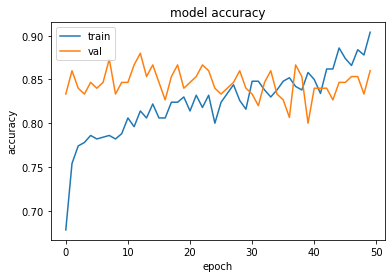

In [62]:
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [63]:
y_pred = n_model.predict(validData)
y_pred

array([[1.4955766e-06],
       [3.1960994e-02],
       [9.2177063e-01],
       [5.5283313e-03],
       [4.8185202e-01],
       [1.4096254e-02],
       [9.9979287e-01],
       [1.9385314e-02],
       [2.7036578e-03],
       [1.4198006e-03],
       [3.9847579e-02],
       [6.8909976e-05],
       [1.1839704e-04],
       [3.8746326e-05],
       [6.9292770e-03],
       [5.5297613e-02],
       [7.2403264e-01],
       [5.6551844e-01],
       [3.6933295e-02],
       [7.1796666e-07],
       [1.0600514e-07],
       [2.8370288e-01],
       [4.0741479e-01],
       [9.0554702e-01],
       [1.5122758e-01],
       [2.0967343e-08],
       [1.3010596e-09],
       [5.8261480e-04],
       [1.1104243e-02],
       [2.7676523e-03],
       [4.2674474e-02],
       [5.0140935e-01],
       [8.6569667e-02],
       [9.3038328e-02],
       [1.5150432e-03],
       [3.3206555e-01],
       [2.5594869e-01],
       [1.8050422e-07],
       [9.6691132e-02],
       [7.9661679e-01],
       [9.7809267e-01],
       [7.088570

In [64]:
from sklearn import metrics
After_valid_Accuracy = metrics.accuracy_score(validLabel,y_pred.round())
print(After_valid_Accuracy)

0.86


In [65]:
#print('Valid set accuracy : {}',format(model.evaluate(testLabel,y_pred)[1]))
print(accuracy_score(validLabel,y_pred.round()),
      matthews_corrcoef(validLabel,y_pred.round()),f1_score(validLabel,y_pred.round()))

0.86 0.6297042048913287 0.72


In [66]:
# first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(validLabel,y_pred)

In [67]:
auc=metrics.roc_auc_score(validLabel,y_pred)
print(auc)

0.895


In [68]:
confusion = metrics.confusion_matrix(validLabel,y_pred.round())
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
confusion

array([[102,   8],
       [ 13,  27]], dtype=int64)

In [69]:
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(validLabel,y_pred.round()))

0.86
0.86


In [70]:
print(TP / float(TP + FN))
print(metrics.recall_score(validLabel,y_pred.round()))

0.675
0.675


In [71]:
print(TP / float(TP + FP))
print(metrics.precision_score(validLabel,y_pred.round()))

0.7714285714285715
0.7714285714285715


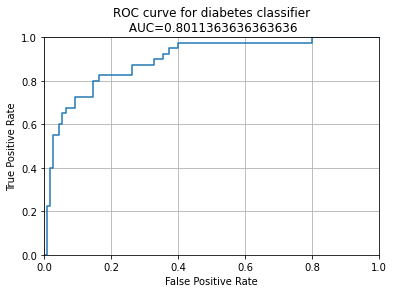

In [72]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier\n AUC={auc}'.format(auc=metrics.roc_auc_score(validLabel,y_pred.round())))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

# evaluate performance on the test data

In [73]:
#generate predictions with optimal hyperparameters
y_test_pred = n_model.predict(testData)

In [74]:
y_test_pred.shape

(118, 1)

In [75]:

print(y_test_pred[:10])


[[4.4965371e-04]
 [4.8093691e-02]
 [2.2705518e-01]
 [2.1465646e-01]
 [2.8418431e-02]
 [9.3419120e-02]
 [2.4154453e-05]
 [9.4045579e-01]
 [8.0443418e-01]
 [1.8234182e-03]]


In [76]:
#print('Test set accuracy : {}',format(model.evaluate(testLabel,y_pred)[1]))
Test_Accuracy = accuracy_score(testLabel,y_test_pred.round())
print(Test_Accuracy,
      matthews_corrcoef(testLabel,y_test_pred.round()),f1_score(testLabel,y_test_pred.round()))

0.7457627118644068 0.4300157011905159 0.6153846153846153


In [77]:
# Generate a classification report
from sklearn.metrics import classification_report, accuracy_score

print(Test_Accuracy)
print(classification_report(testLabel, y_test_pred.round()))

0.7457627118644068
              precision    recall  f1-score   support

         0.0       0.78      0.84      0.81        76
         1.0       0.67      0.57      0.62        42

    accuracy                           0.75       118
   macro avg       0.72      0.71      0.71       118
weighted avg       0.74      0.75      0.74       118



In [78]:
fpr, tpr, thresholds = metrics.roc_curve(testLabel,y_test_pred)

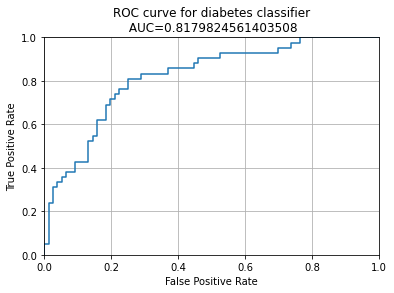

In [79]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier\n AUC={auc}'.format(auc=metrics.roc_auc_score(testLabel,y_test_pred)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)